In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from akita_utils.format_io import h5_to_df

In [3]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import average_stat_over_targets

In [4]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"
data_dir = "/project/fudenber_735/akitaX1_analyses_data/virtual_insertion_pairwise_mutagenesis"

In [5]:
keys_to_ignore = ["disruption_SCD",
                 "insertion_SCD"]

In [6]:
# reading and averaging data for model 0, bg 0
df_m0_bg0 = h5_to_df(data_dir+"/second100_model_0.h5", ["SCD", "INS-16", "INS-64"], average=False, ignore_keys=keys_to_ignore) 

In [7]:
df_m0_bg0_tg = average_stat_over_targets(df_m0_bg0, model_index=0, head_index=1, stat=stat_of_analysis_interest)

## Separate Plot for Each Site

In [8]:
grouped = df_m0_bg0_tg.groupby(["chrom", "start", "end", "strand"])

In [9]:
# Determine global min and max SCD_m0 values for the color scale
global_min_scd = df_m0_bg0_tg["SCD_m0"].min()
global_max_scd = df_m0_bg0_tg["SCD_m0"].max()

chr1 5905000 5905019 -


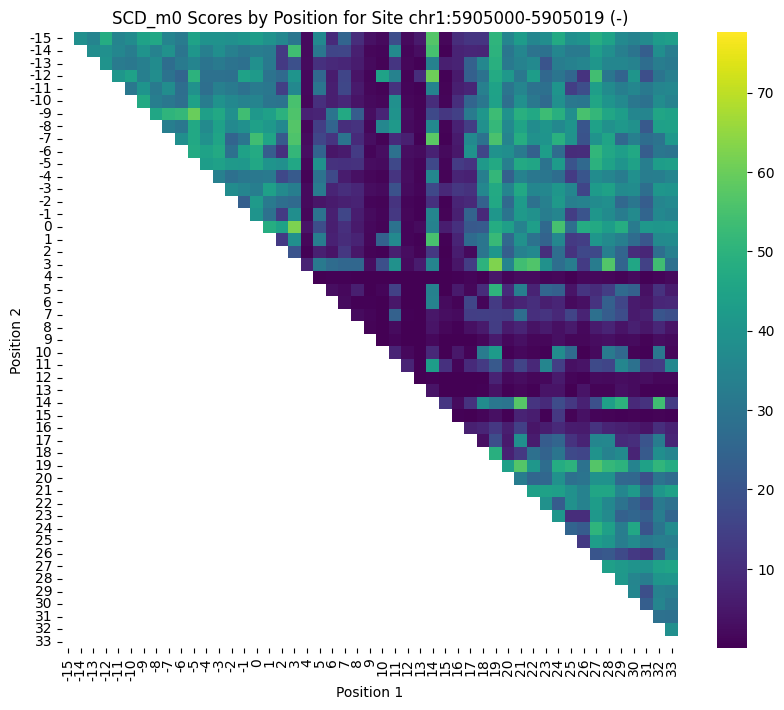

chr1 11657891 11657910 +


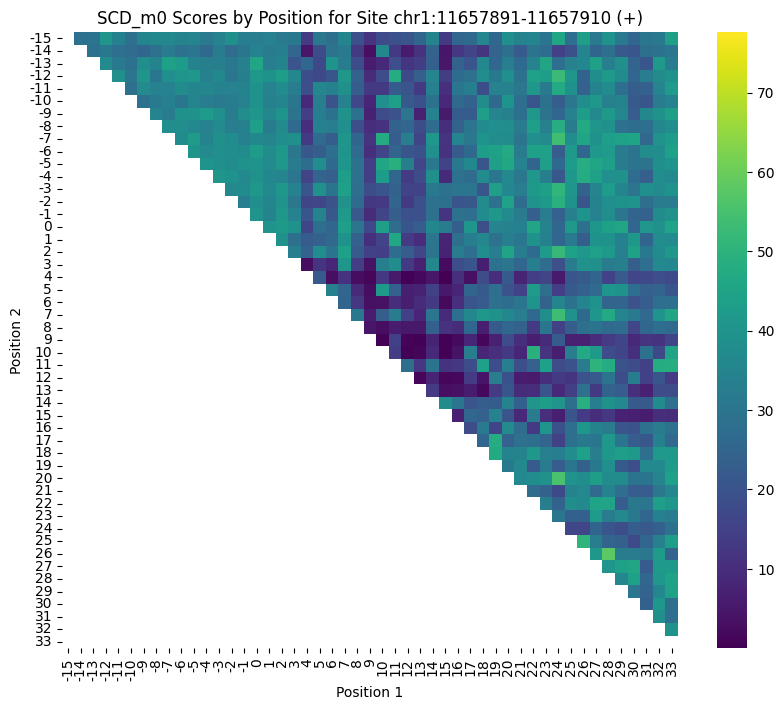

chr1 38787633 38787652 -


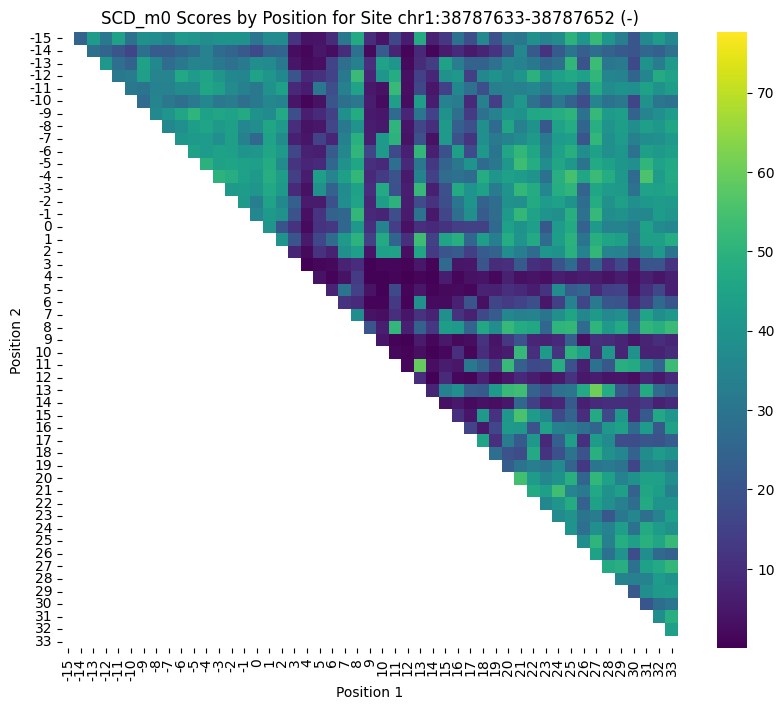

chr1 44745863 44745882 +


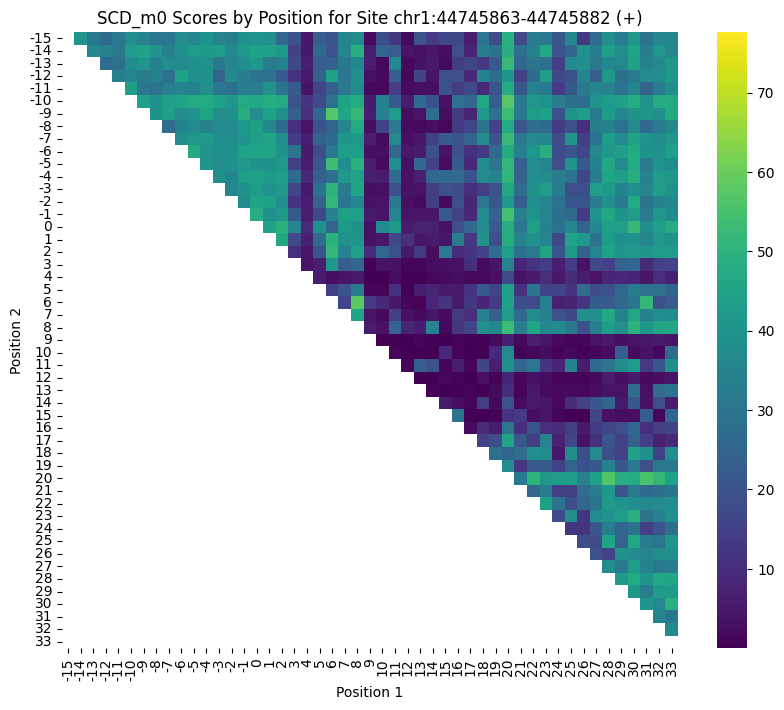

chr1 89631938 89631957 -


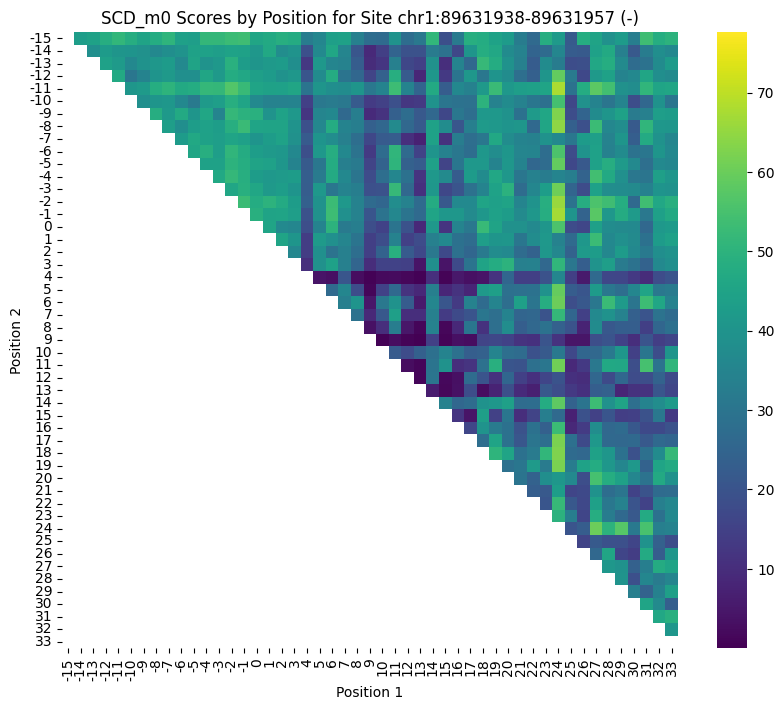

chr1 119083843 119083862 -


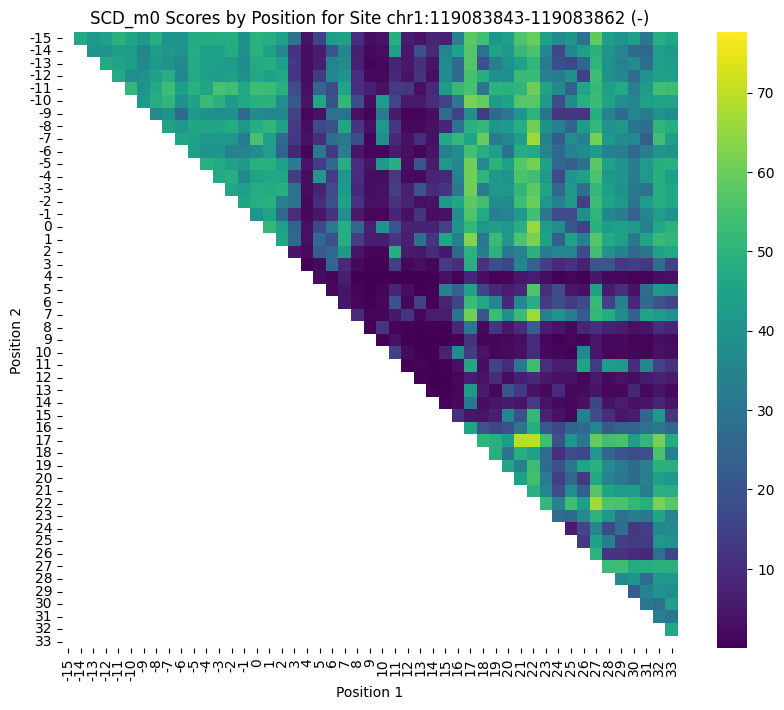

chr1 135136682 135136701 -


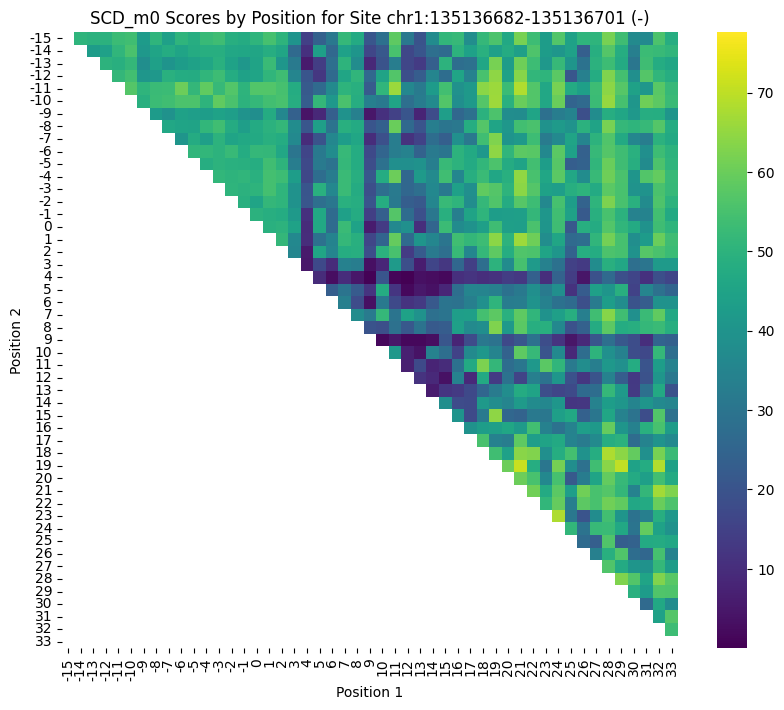

chr1 161737046 161737065 -


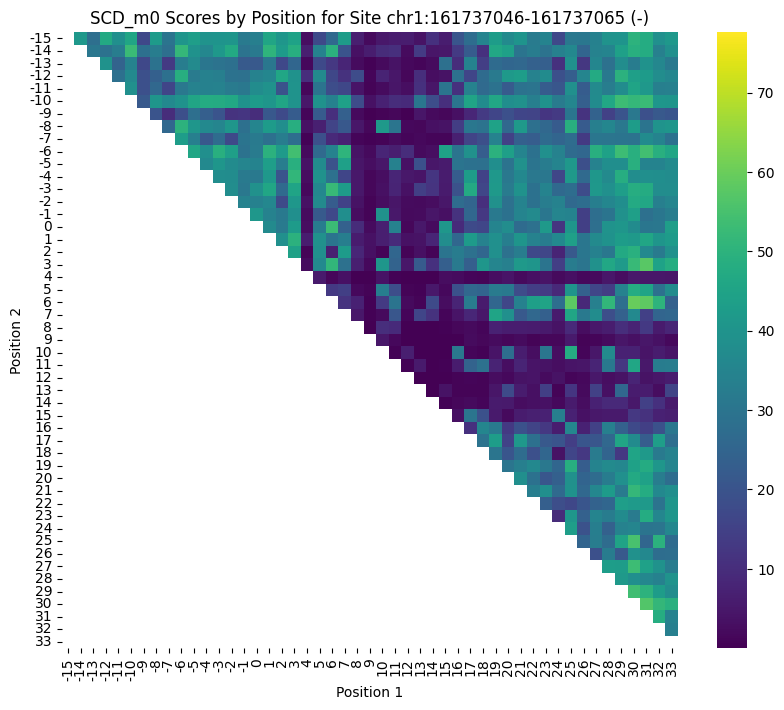

chr10 8240449 8240468 -


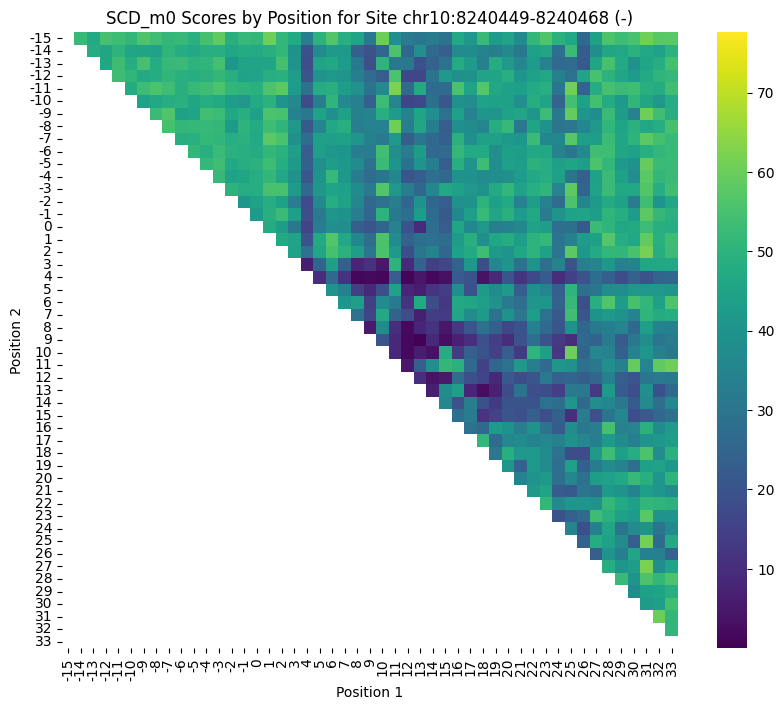

chr10 39520551 39520570 -


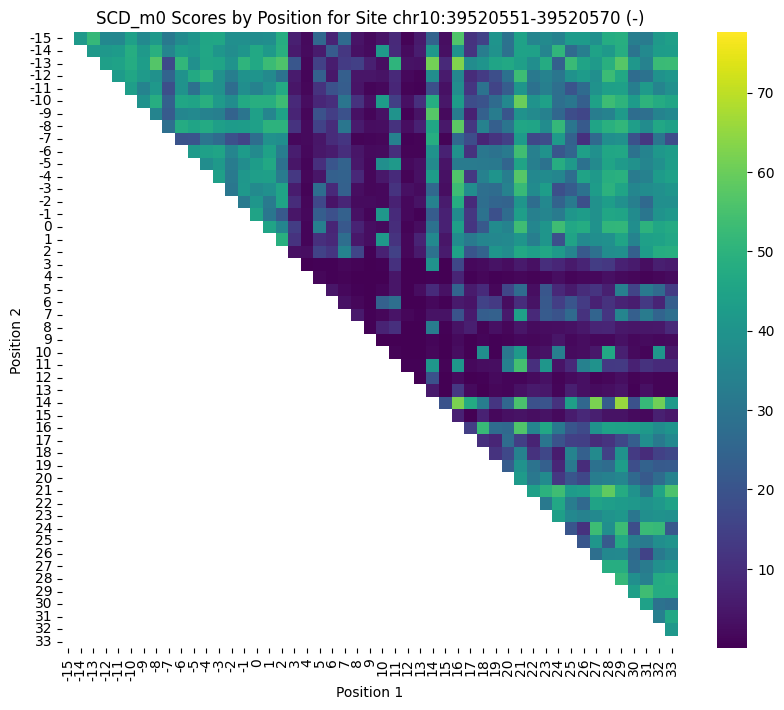

chr10 57448112 57448131 -


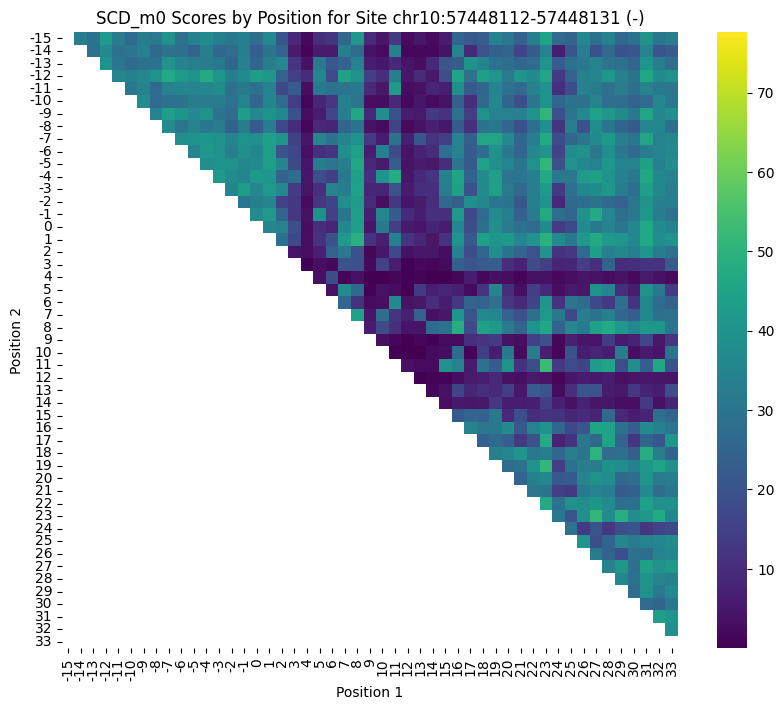

chr10 106609231 106609250 +


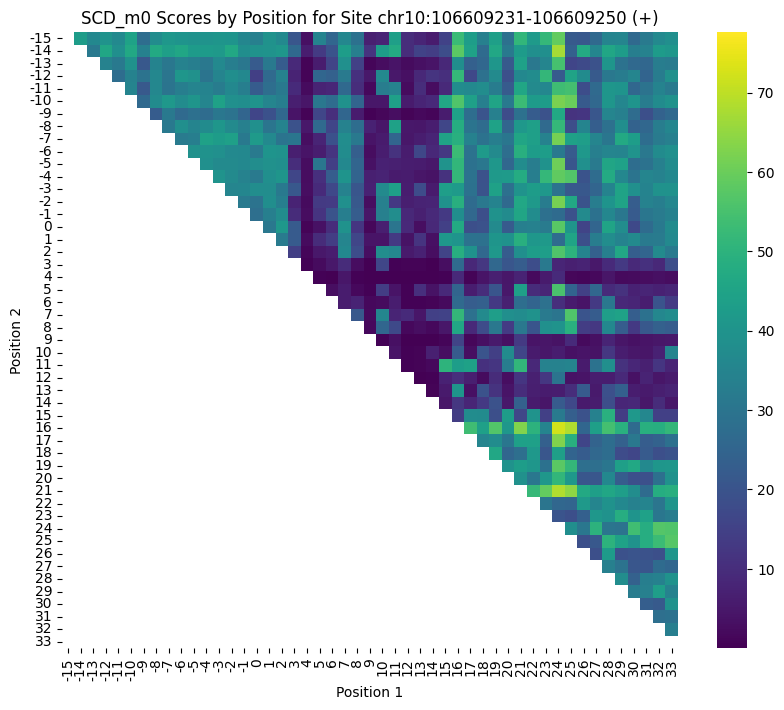

chr11 31949597 31949616 -


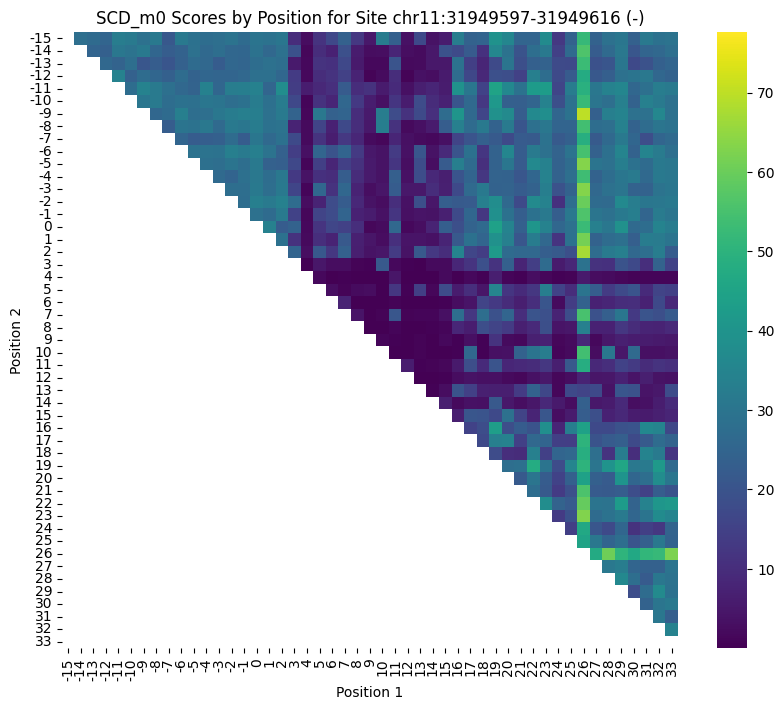

chr12 10598548 10598567 +


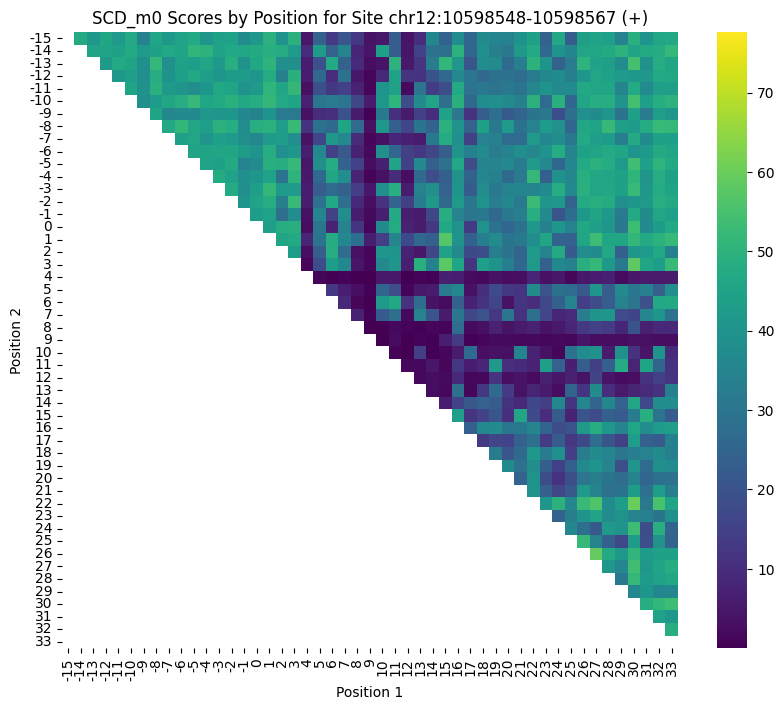

chr12 32897665 32897684 -


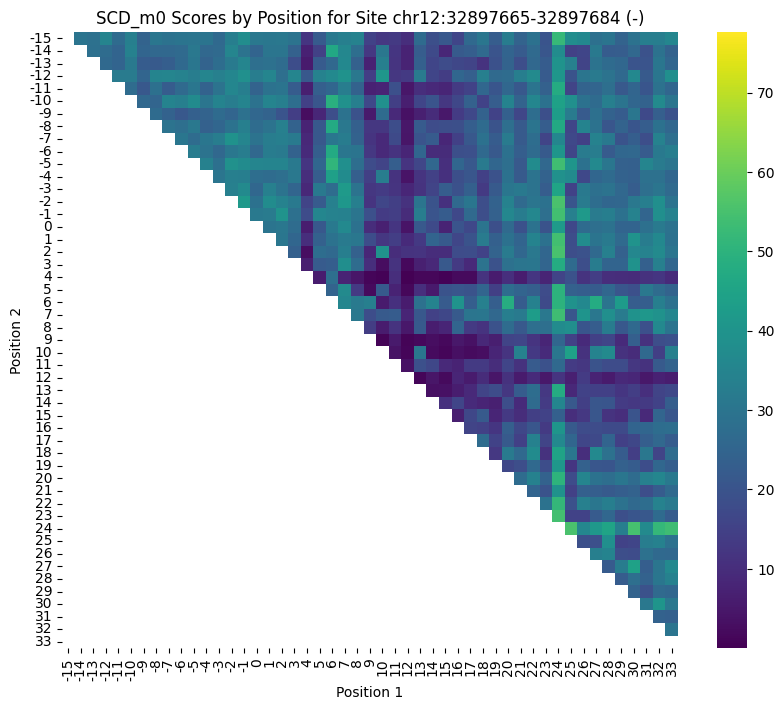

chr12 40837731 40837750 +


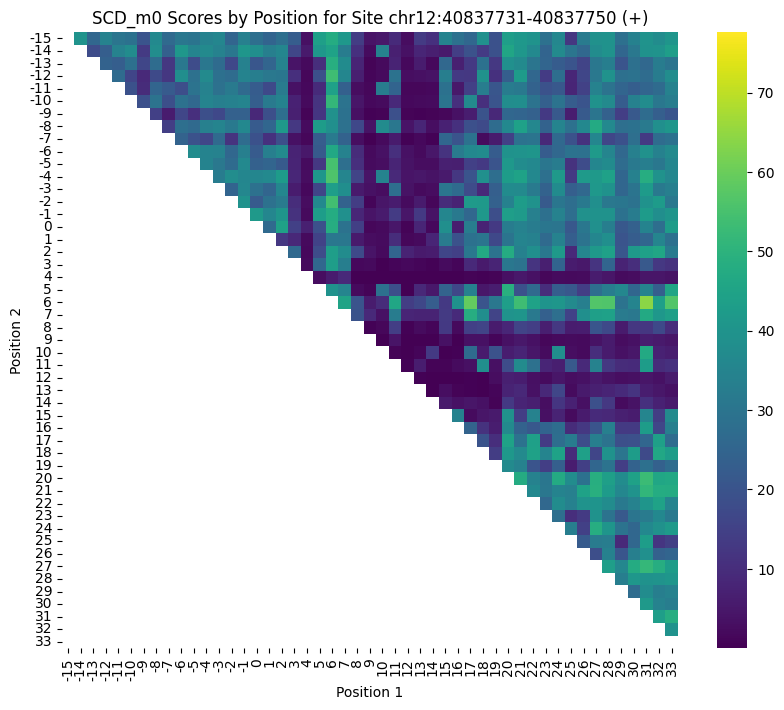

chr12 74013946 74013965 -


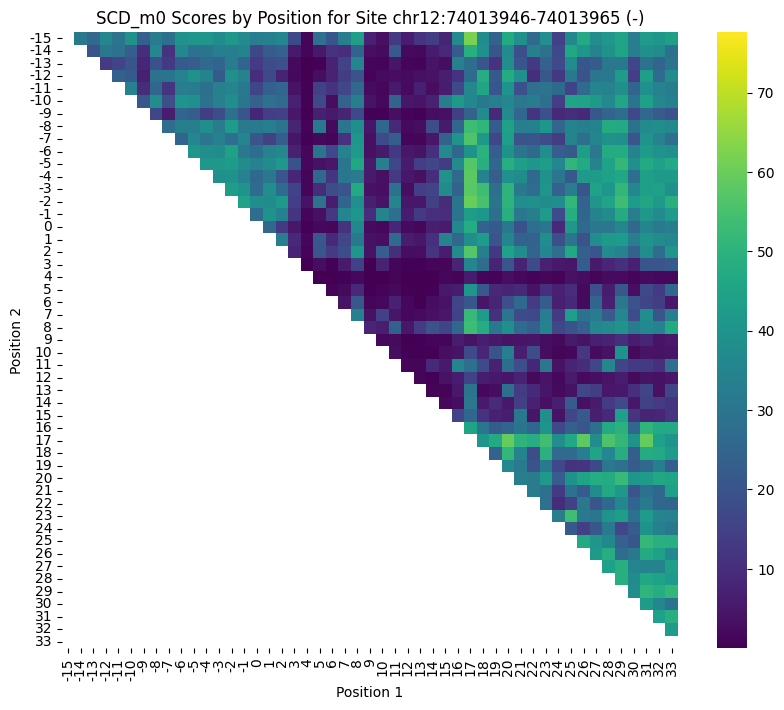

chr12 89451125 89451144 -


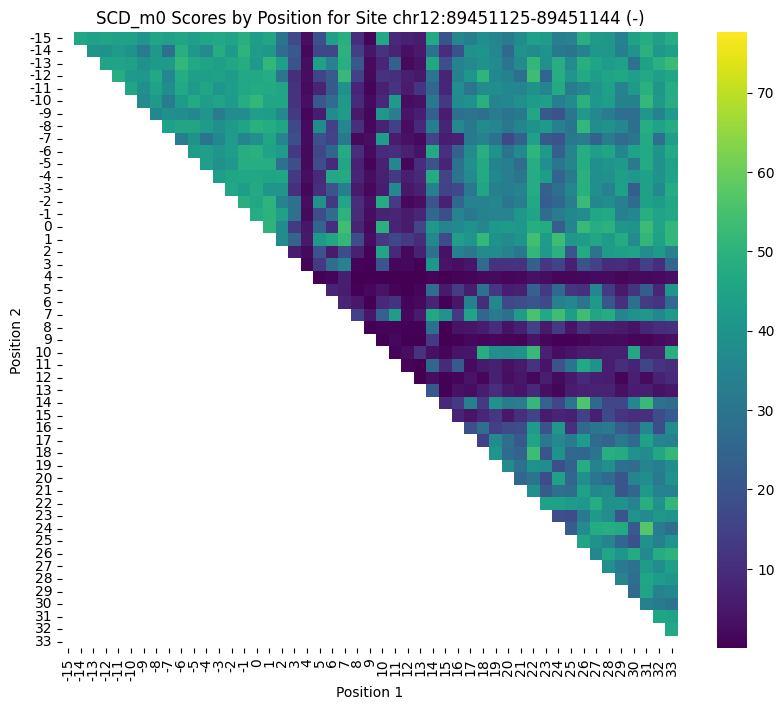

chr13 19698902 19698921 +


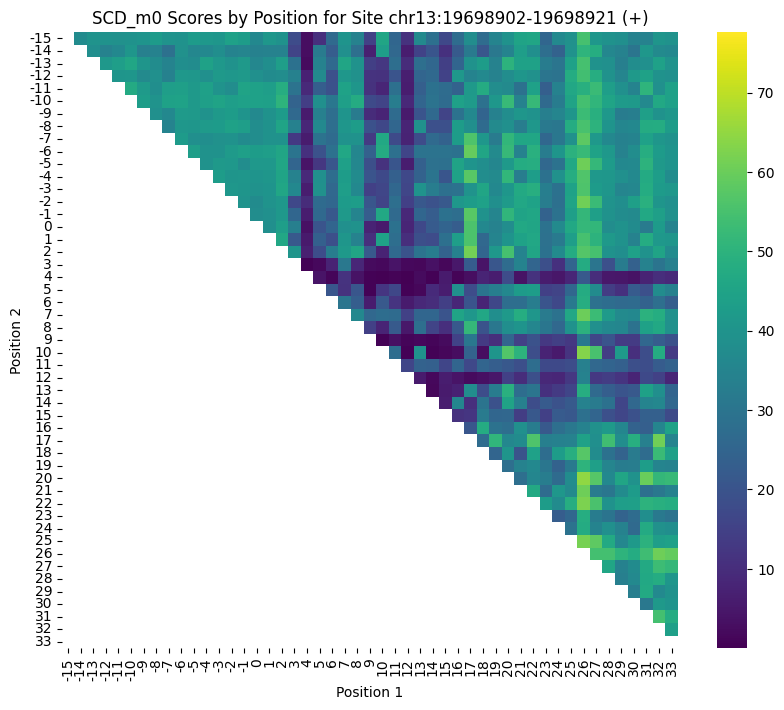

chr13 21803269 21803288 -


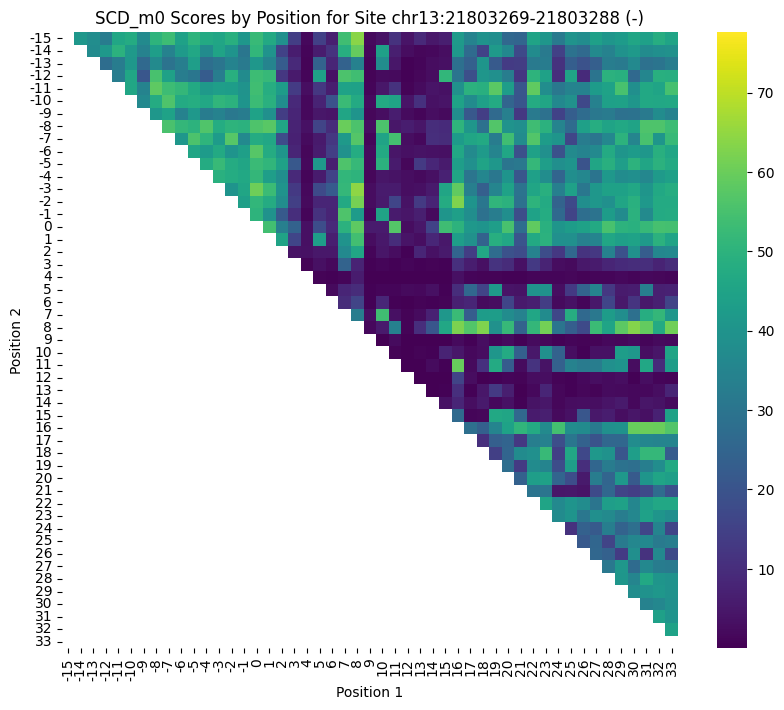

chr13 41634725 41634744 -


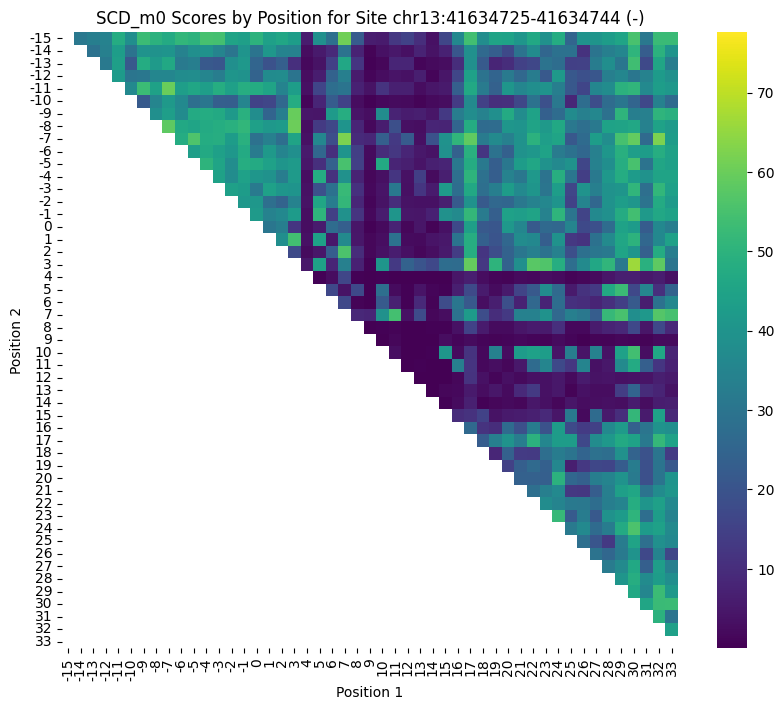

chr13 42822766 42822785 -


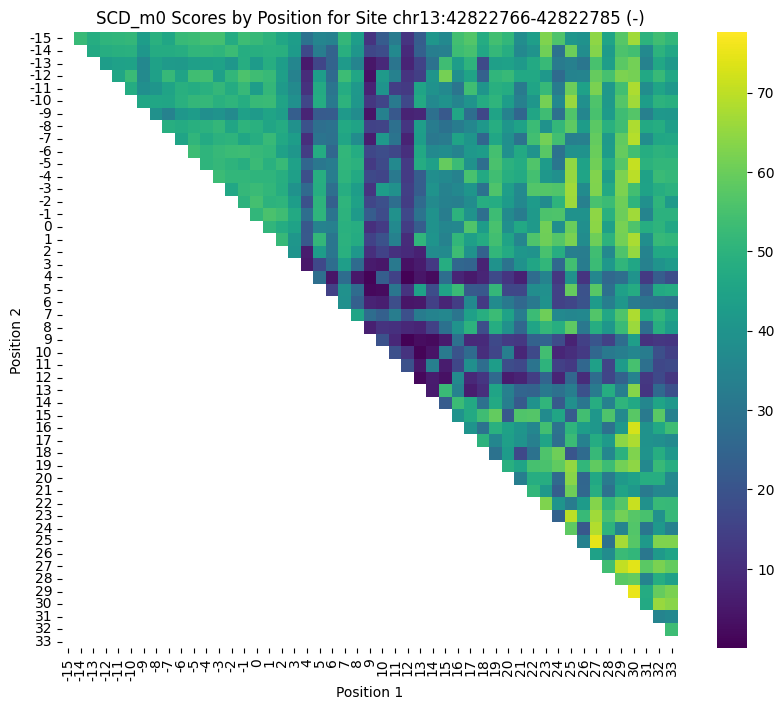

chr13 47301226 47301245 +


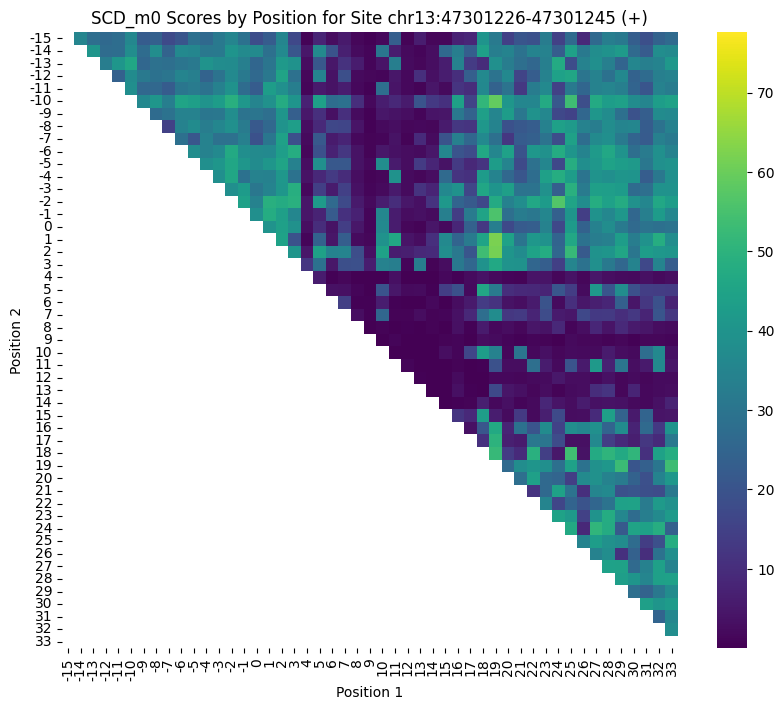

chr14 21120657 21120676 +


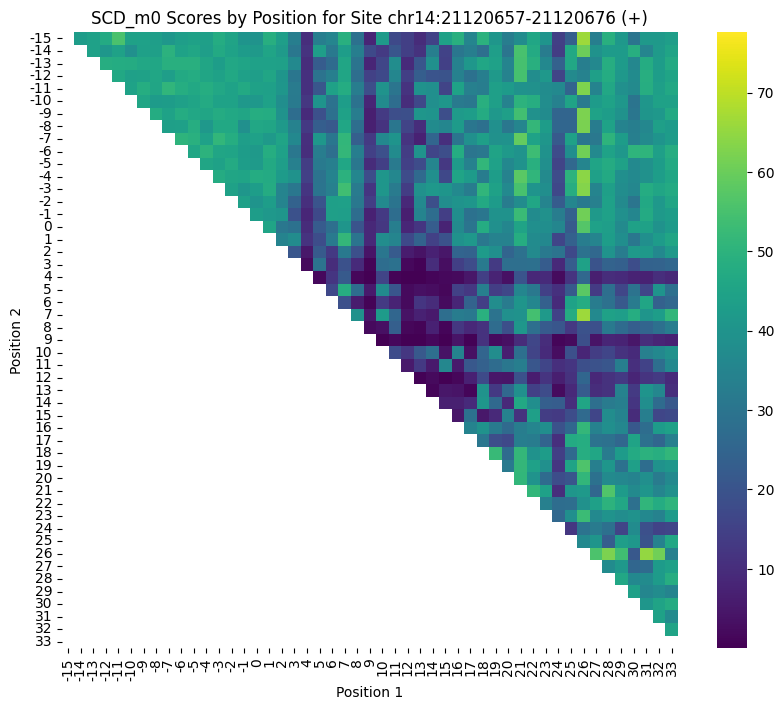

chr14 48367283 48367302 -


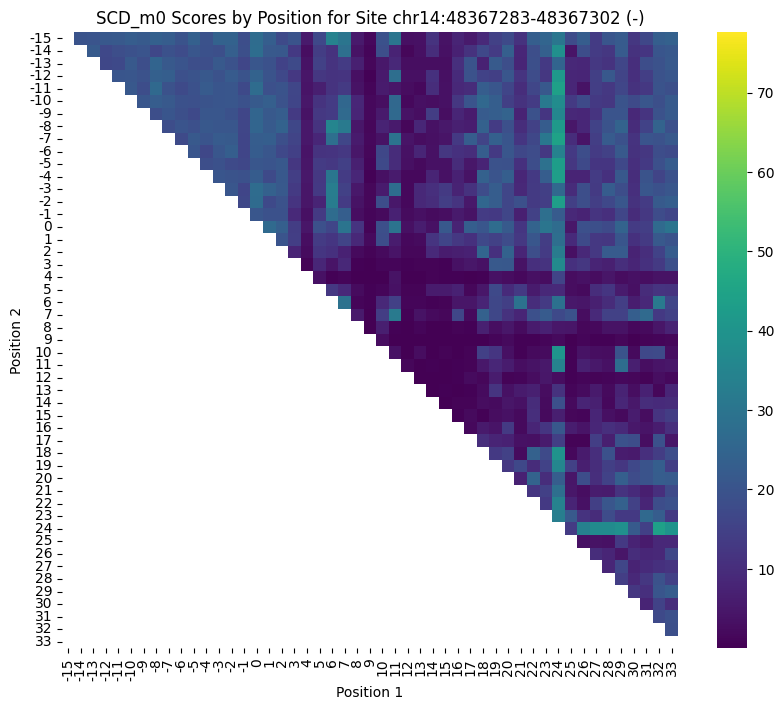

chr14 51098488 51098507 -


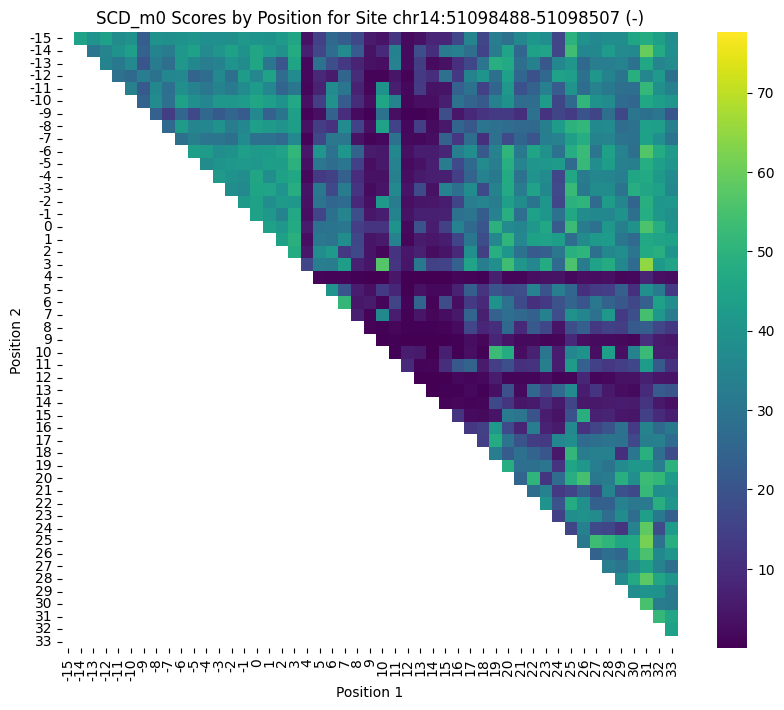

chr14 59605824 59605843 +


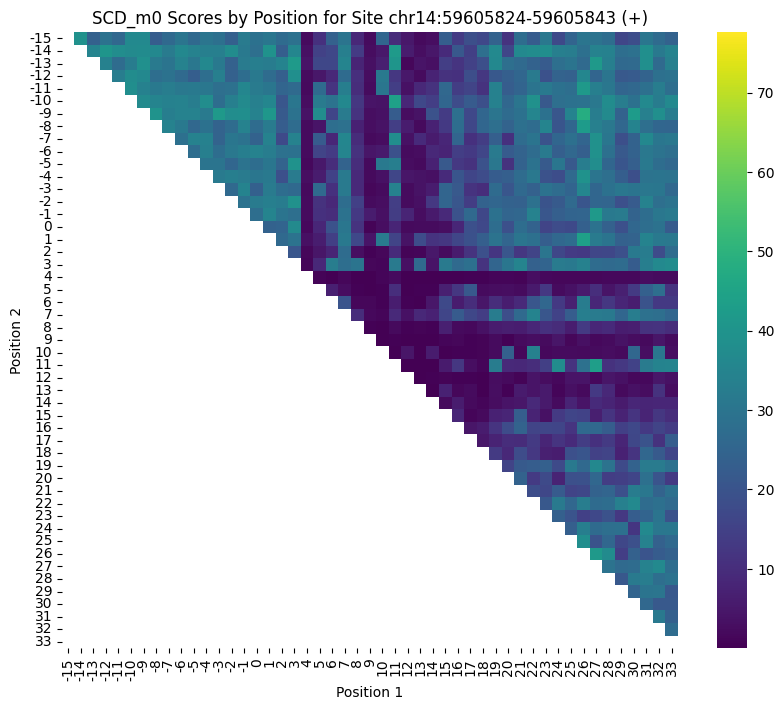

chr14 67674839 67674858 -


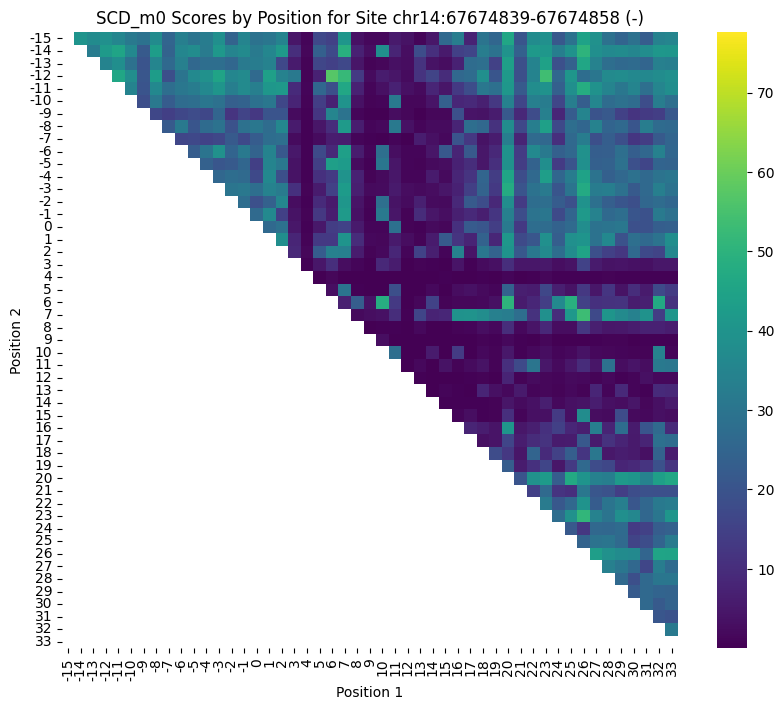

chr14 76473593 76473612 -


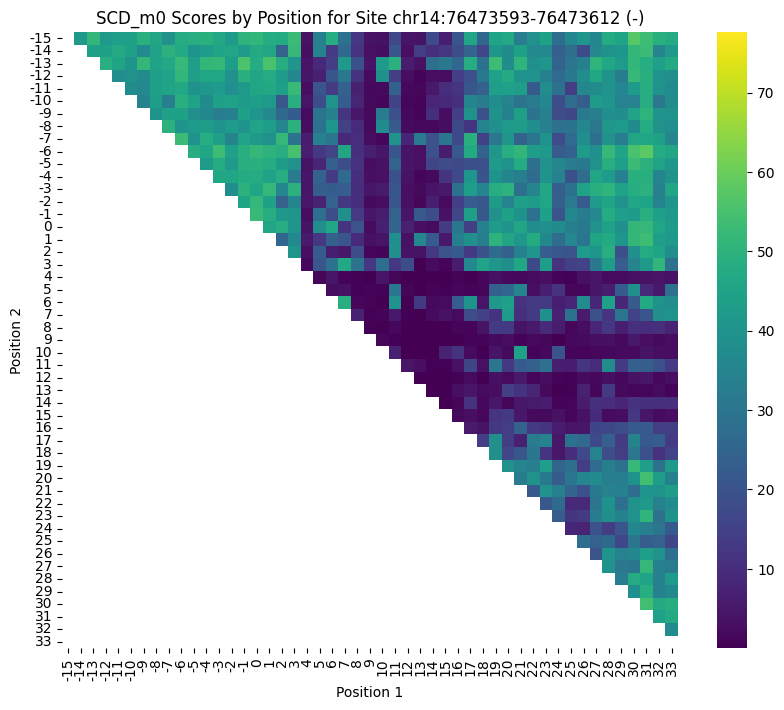

chr14 104039034 104039053 +


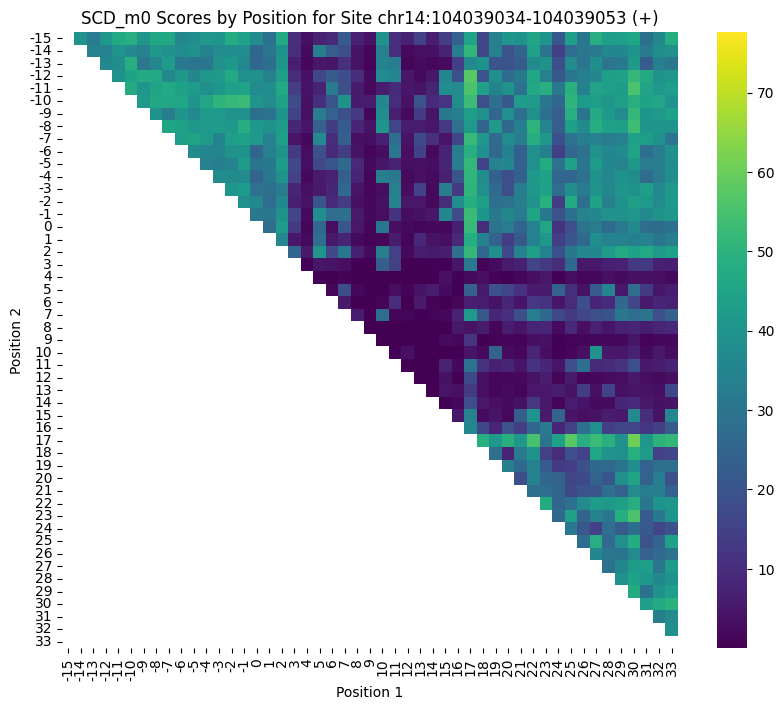

chr15 11038668 11038687 +


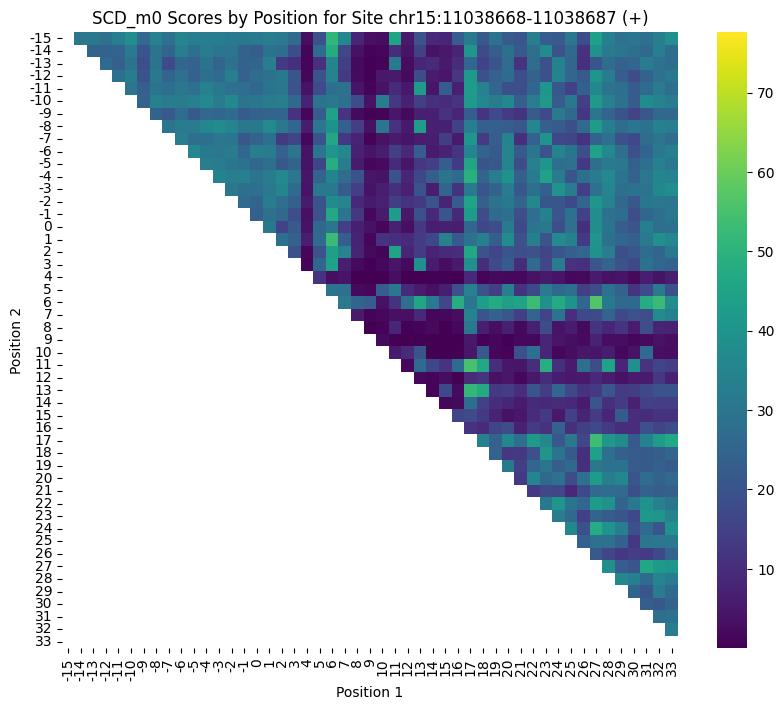

chr15 40166877 40166896 +


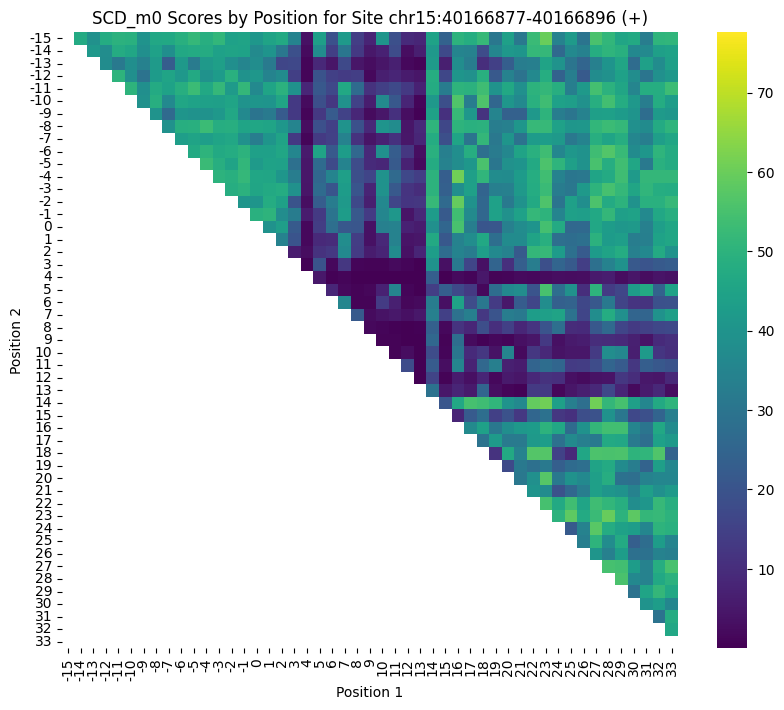

chr15 44836383 44836402 +


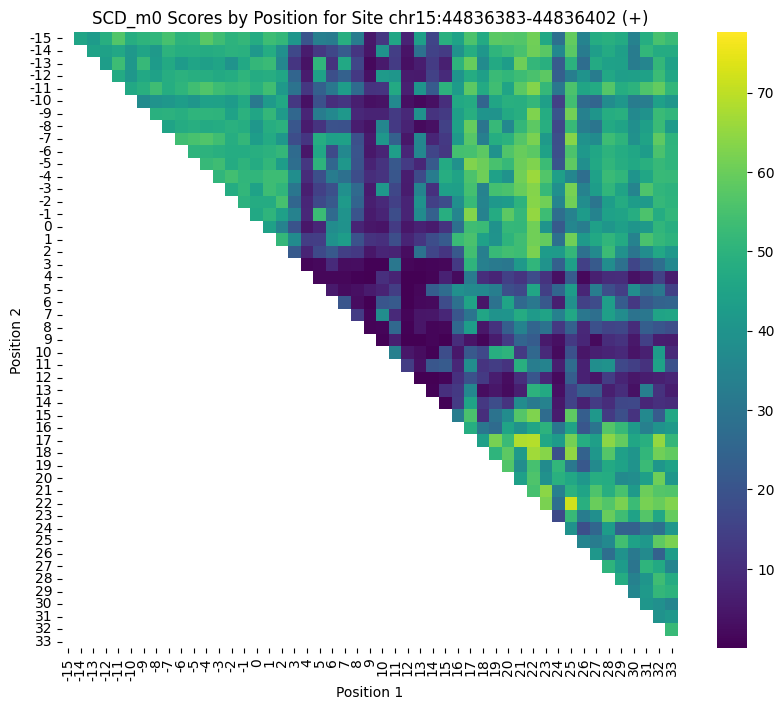

chr15 56066321 56066340 +


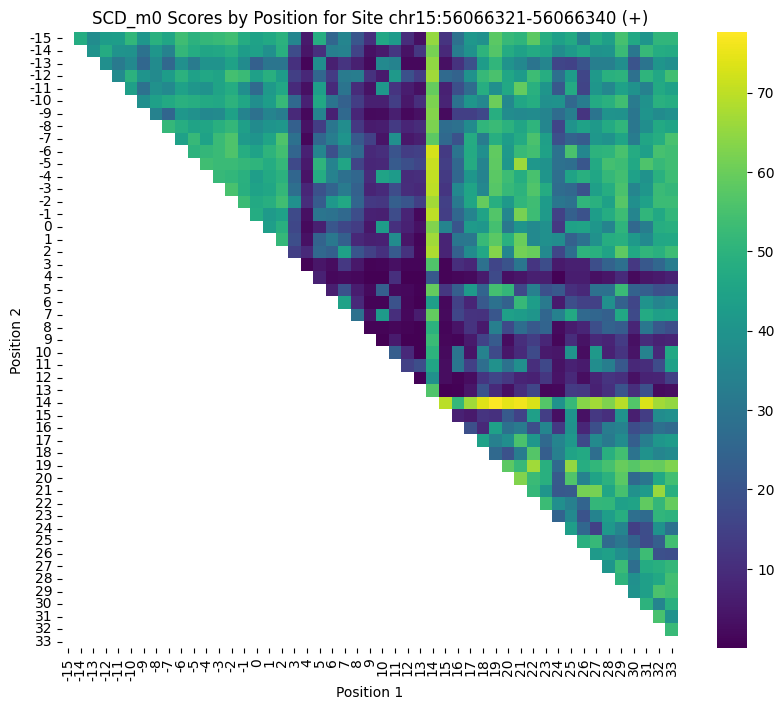

chr15 59389408 59389427 +


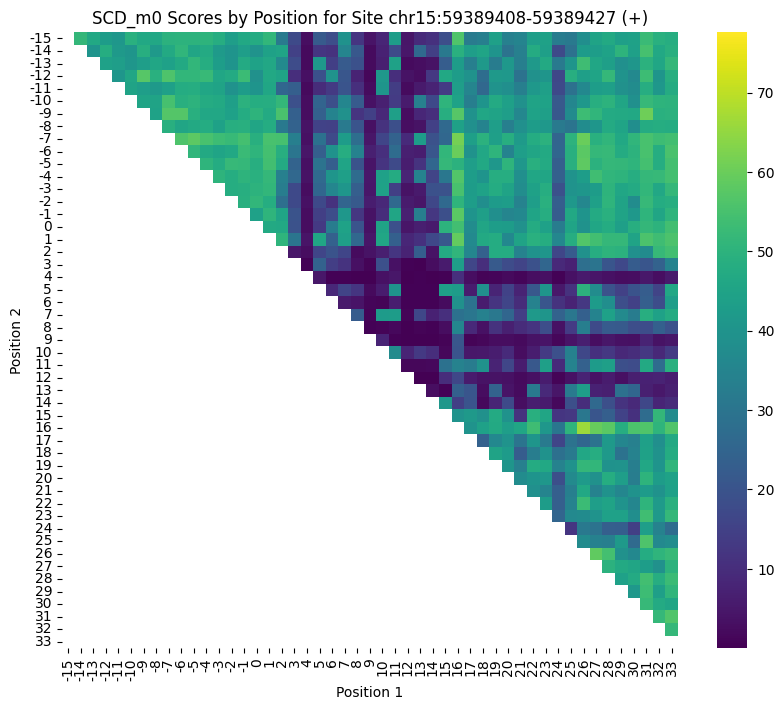

chr15 85266904 85266923 +


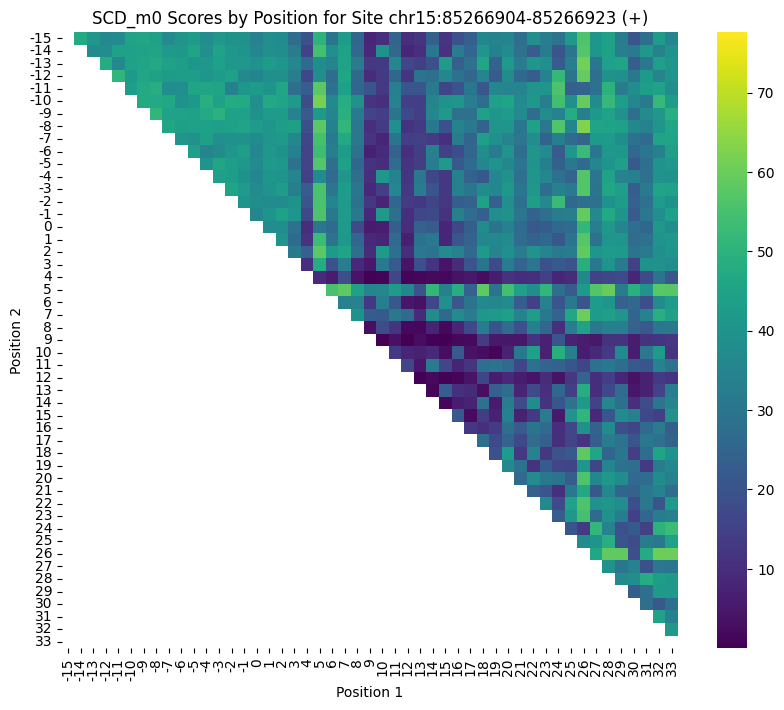

chr16 25349805 25349824 -


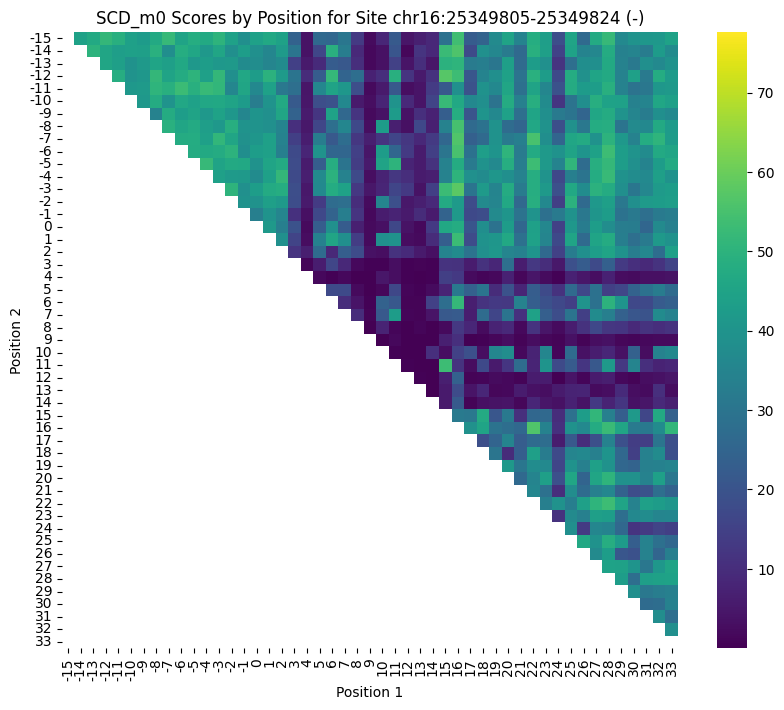

chr16 42169923 42169942 +


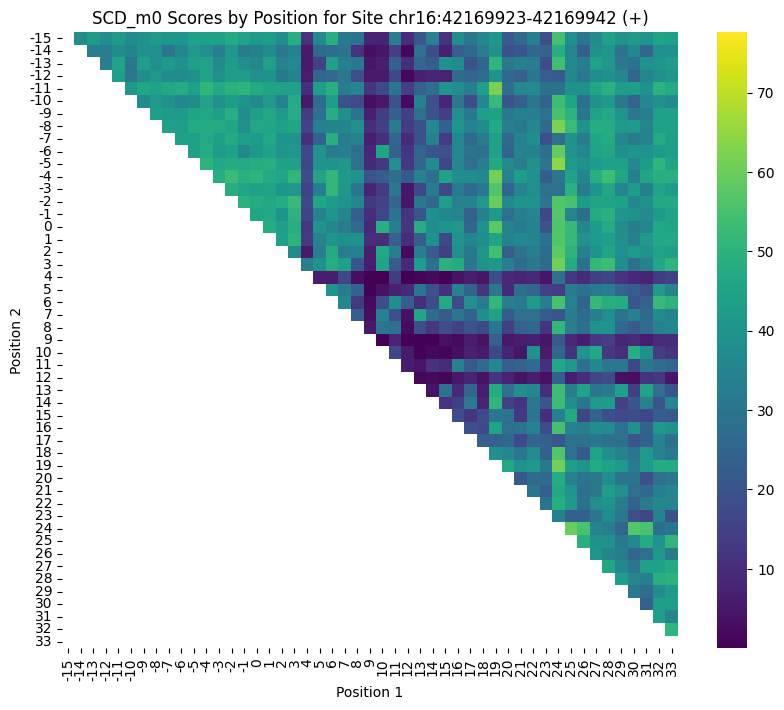

chr16 71247683 71247702 +


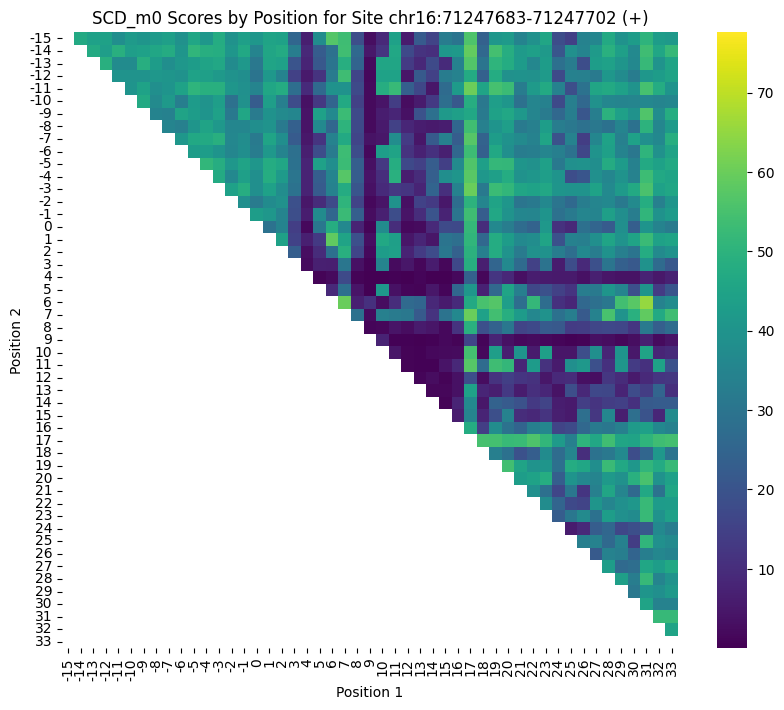

chr16 72215914 72215933 -


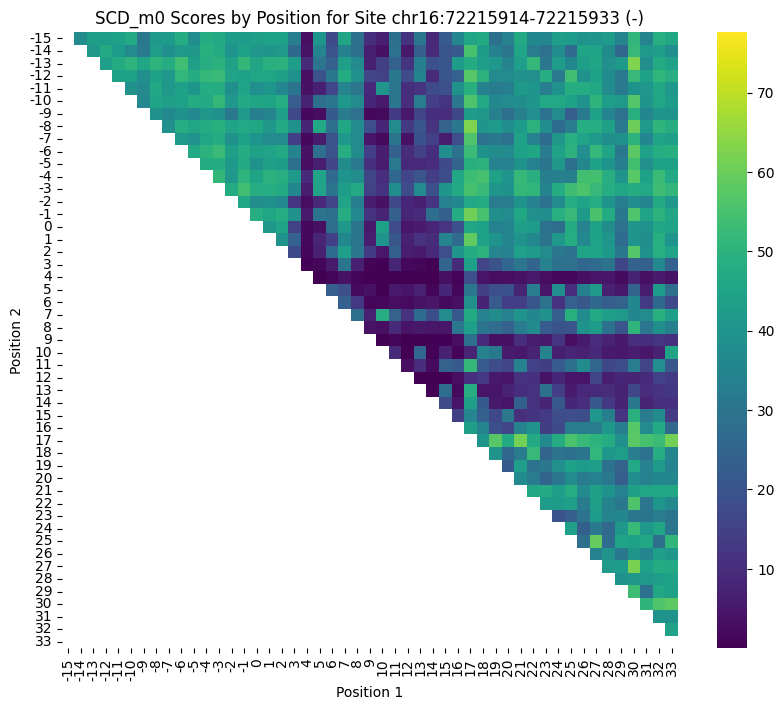

chr16 91936513 91936532 +


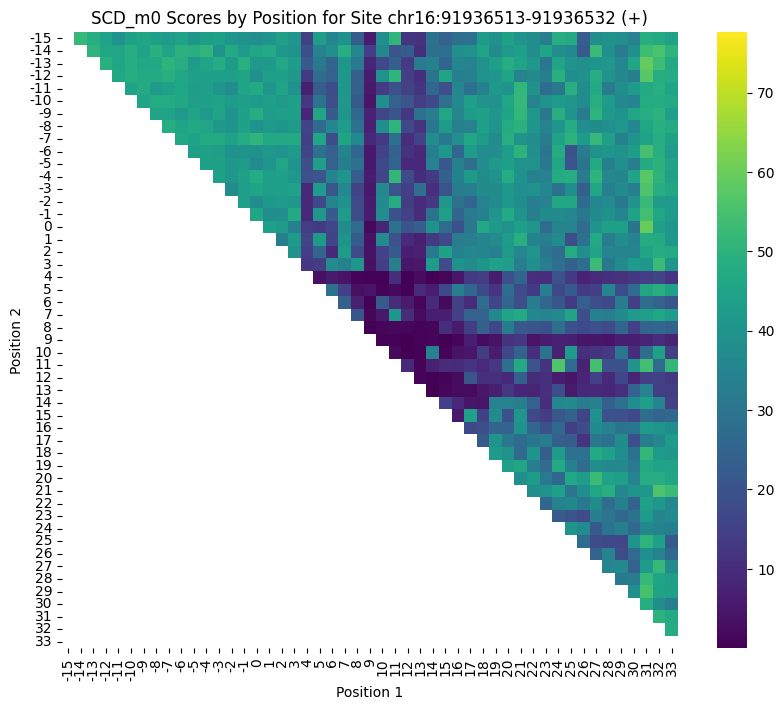

chr17 42603598 42603617 -


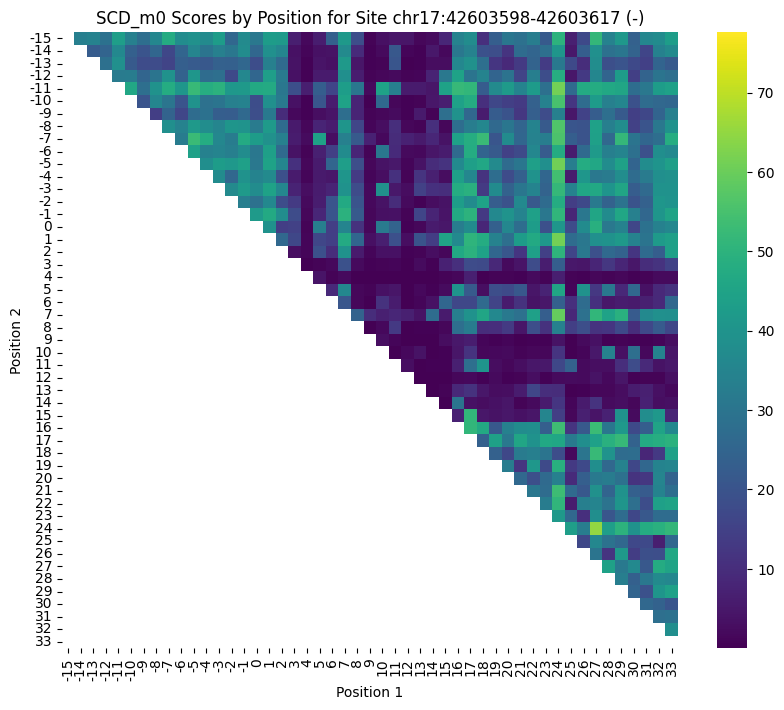

chr17 44261982 44262001 +


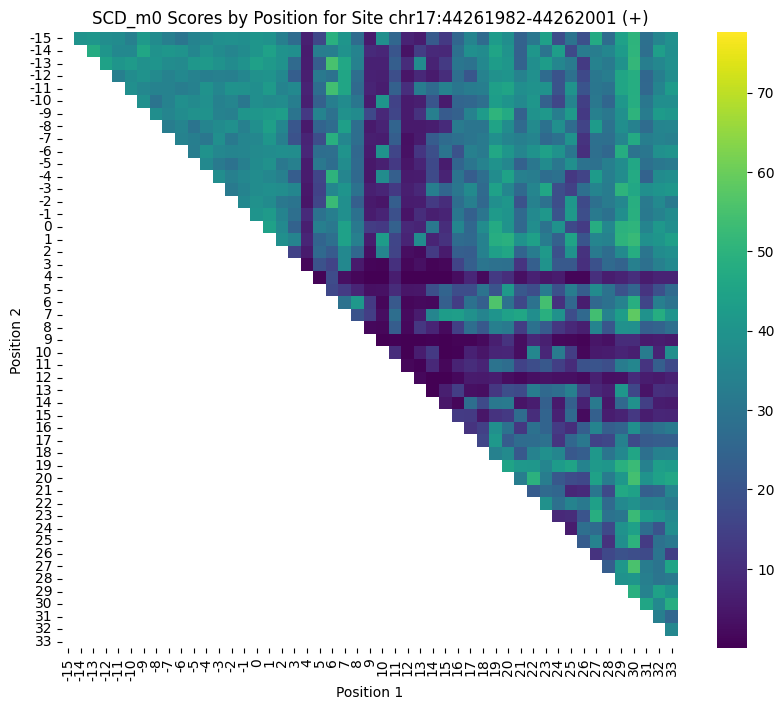

chr18 19939543 19939562 -


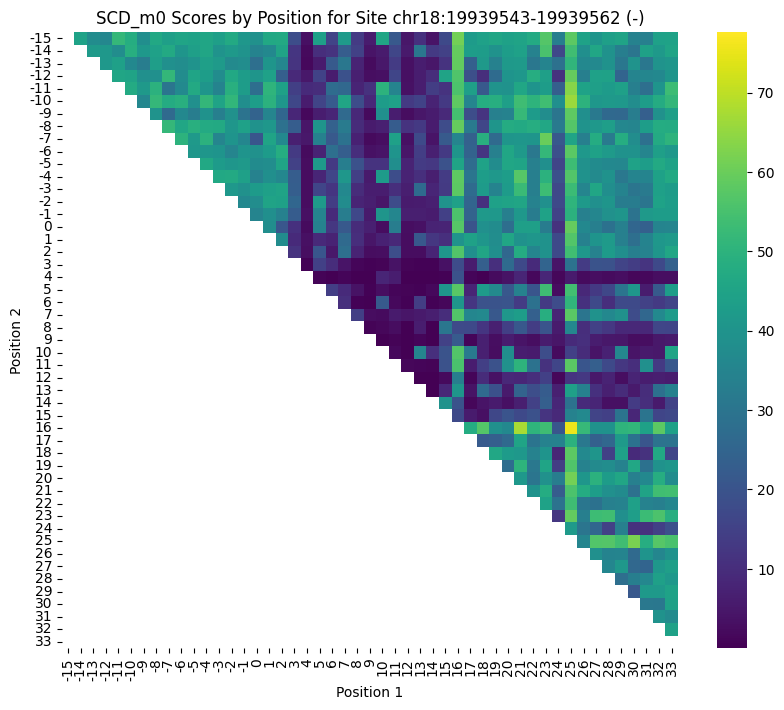

chr18 57976796 57976815 +


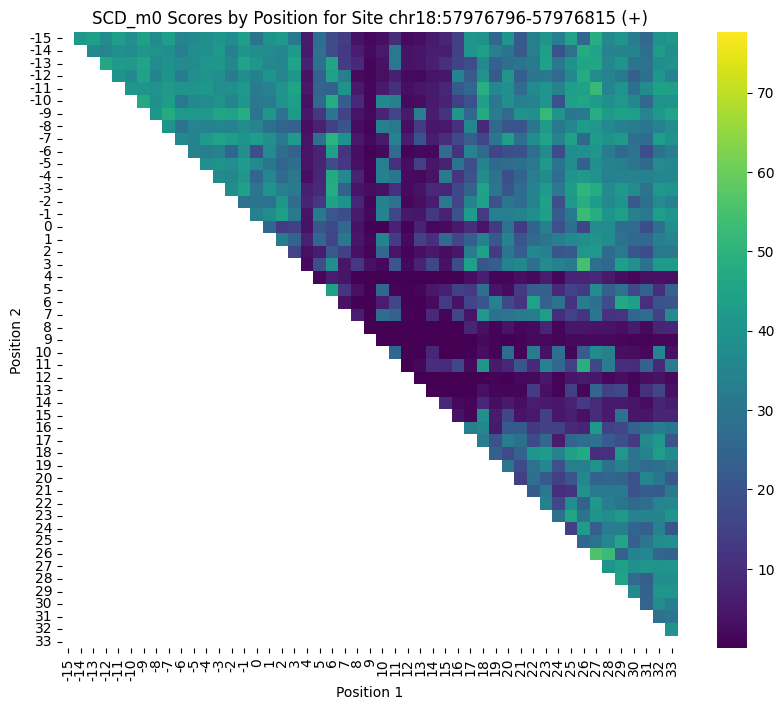

chr19 30217496 30217515 +


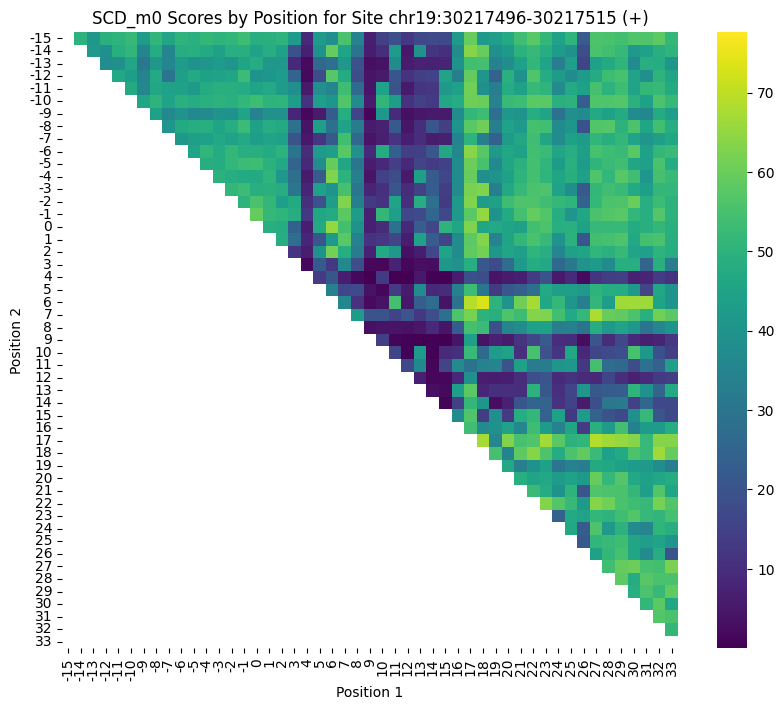

chr19 50185467 50185486 +


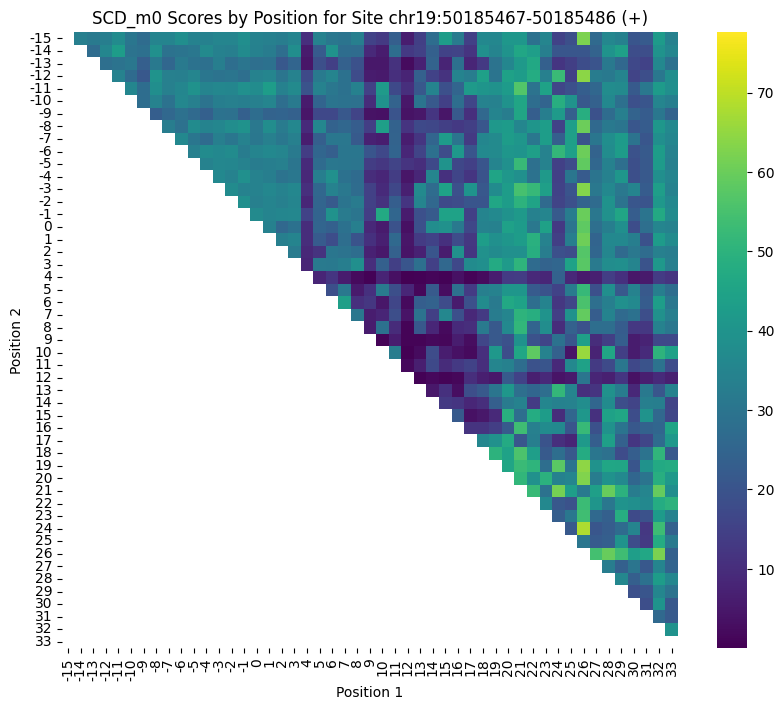

chr19 52993223 52993242 -


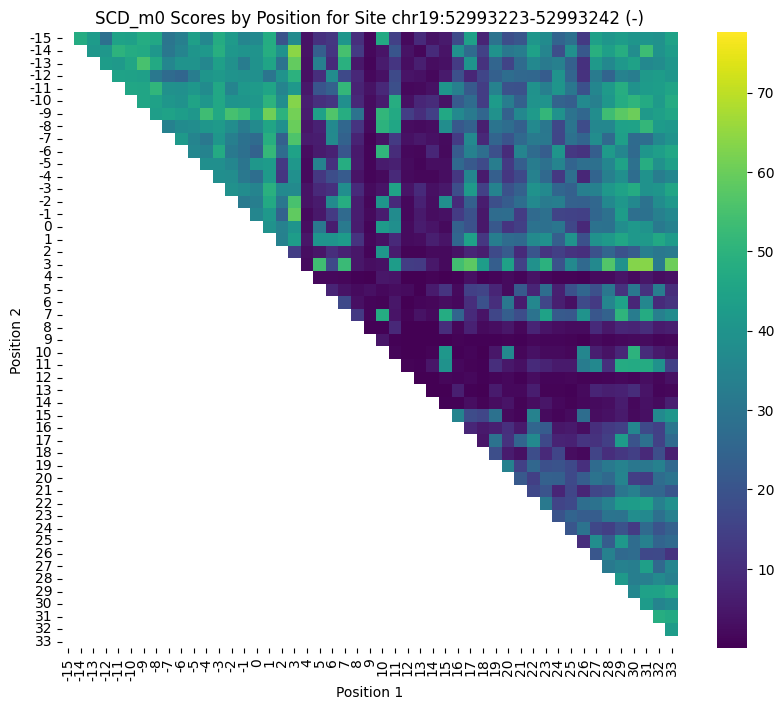

chr2 48886252 48886271 -


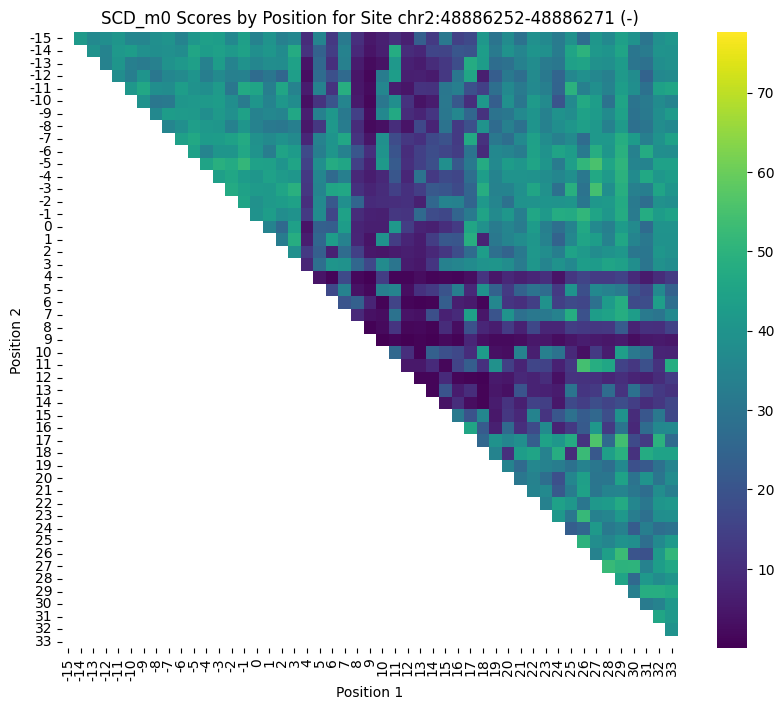

chr2 113494885 113494904 +


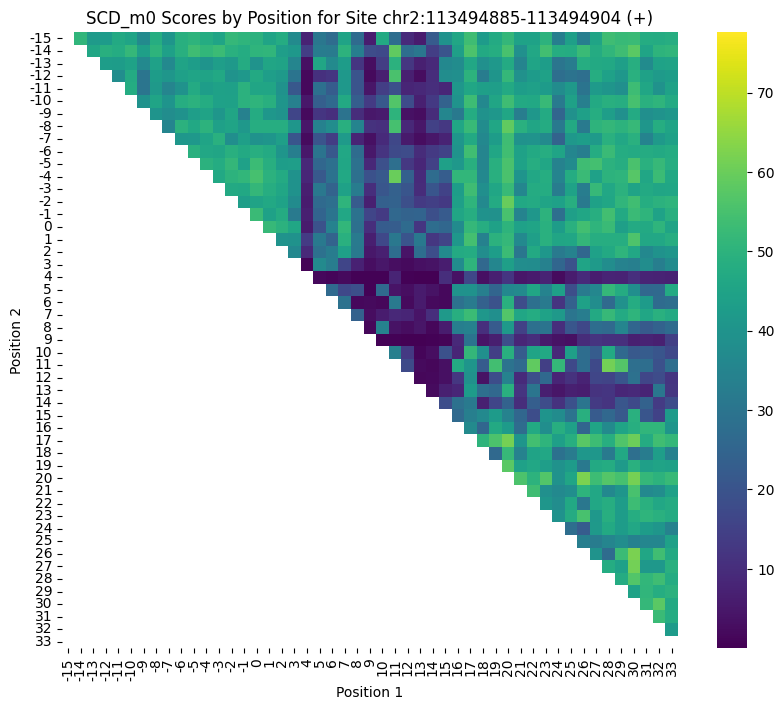

chr2 160593216 160593235 -


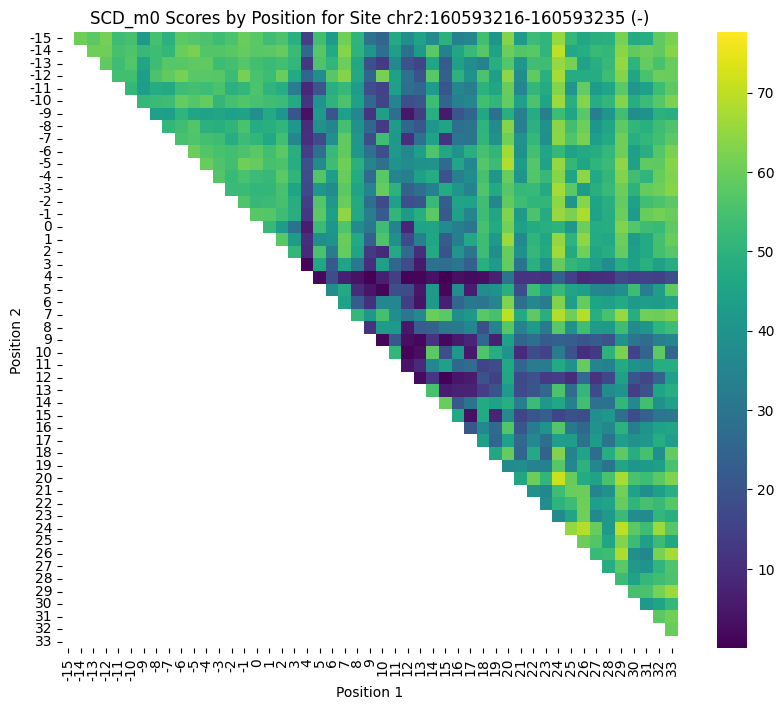

chr2 165779073 165779092 +


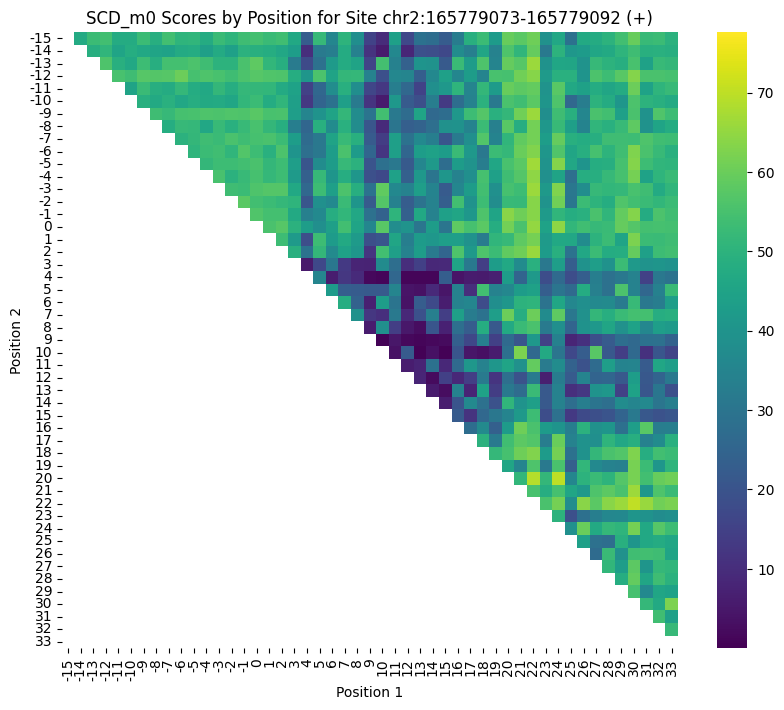

chr2 166085167 166085186 +


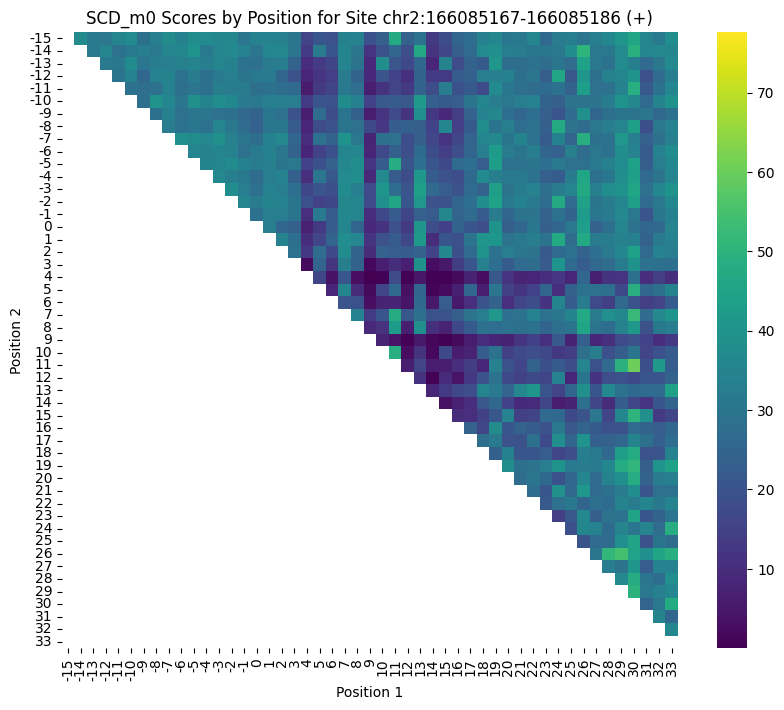

chr3 31146116 31146135 +


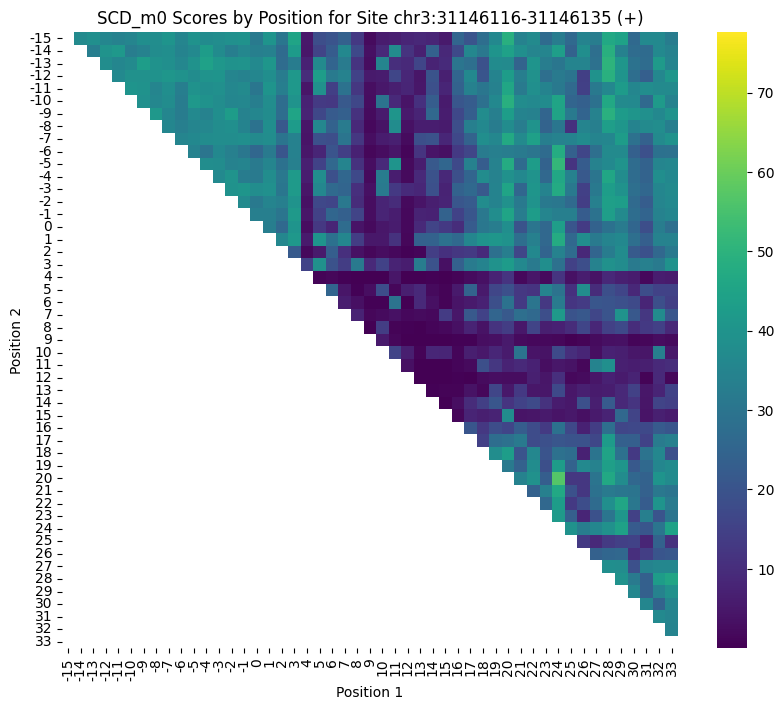

chr3 57843966 57843985 +


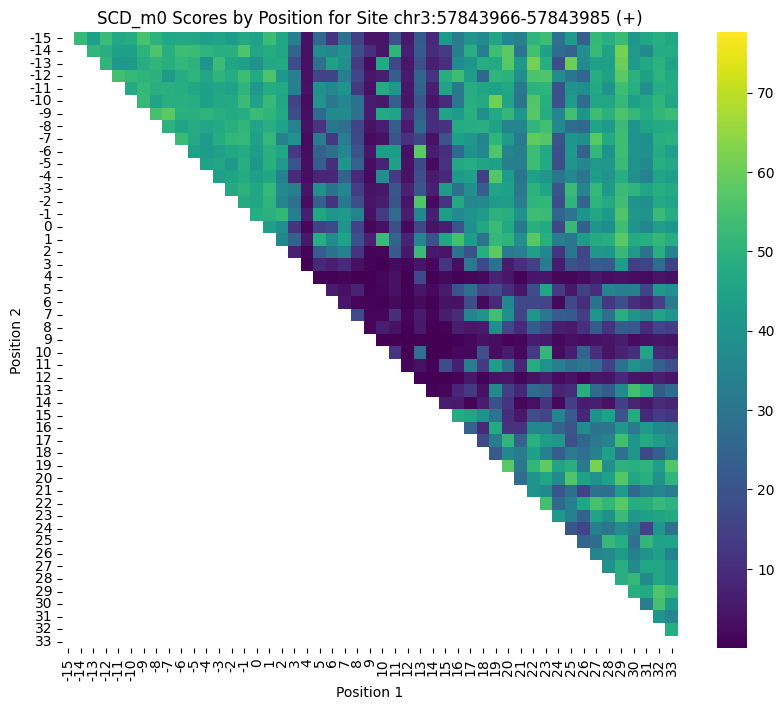

chr3 59077479 59077498 +


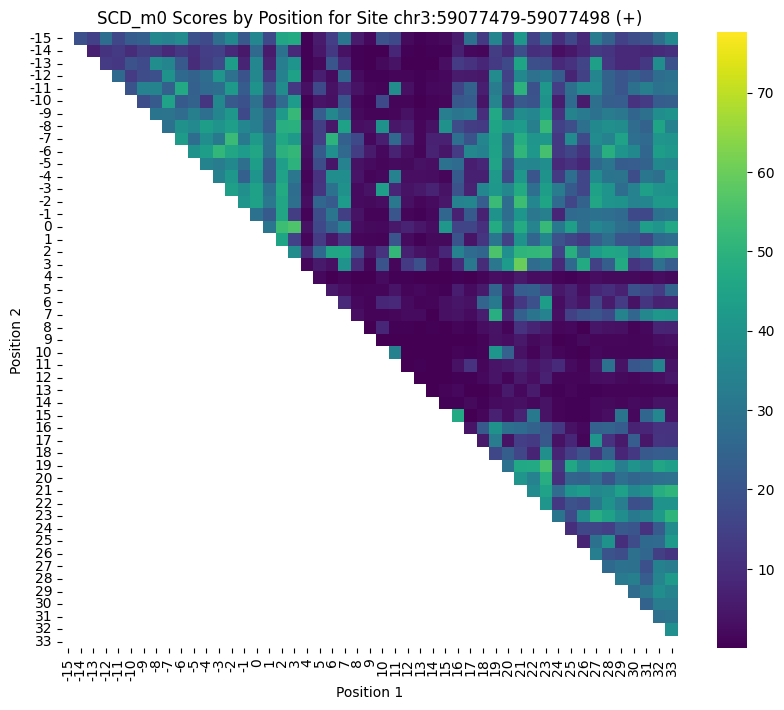

chr3 127971074 127971093 +


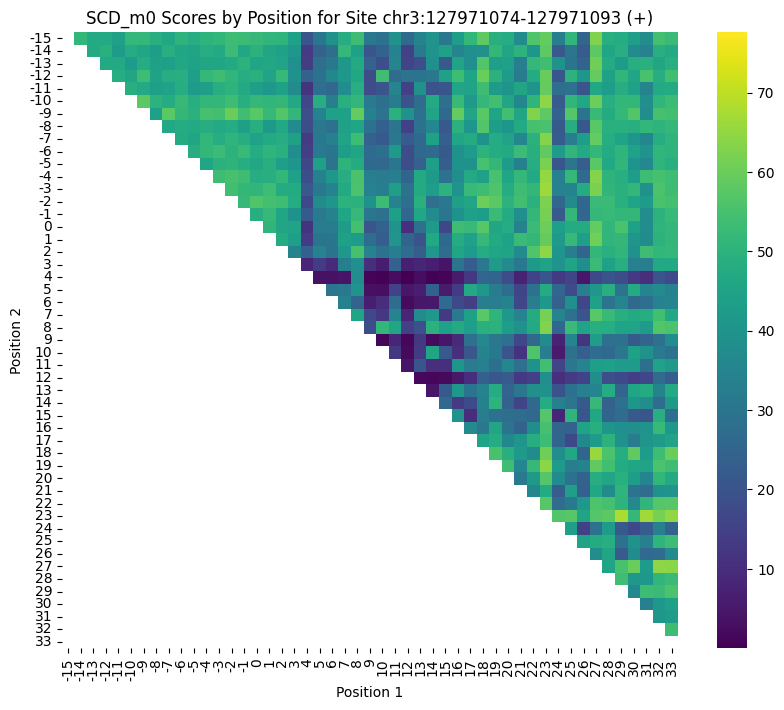

chr3 128349301 128349320 +


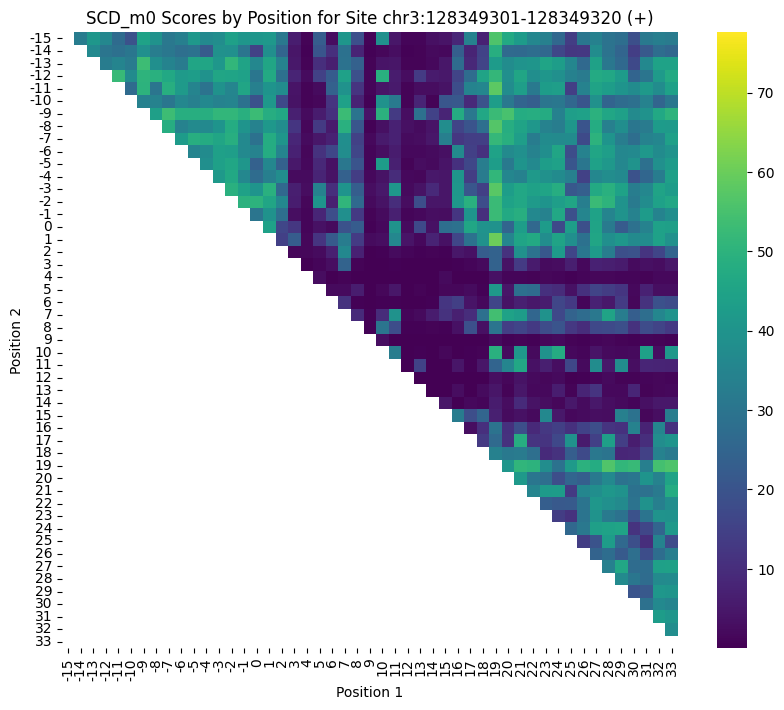

chr4 3967714 3967733 -


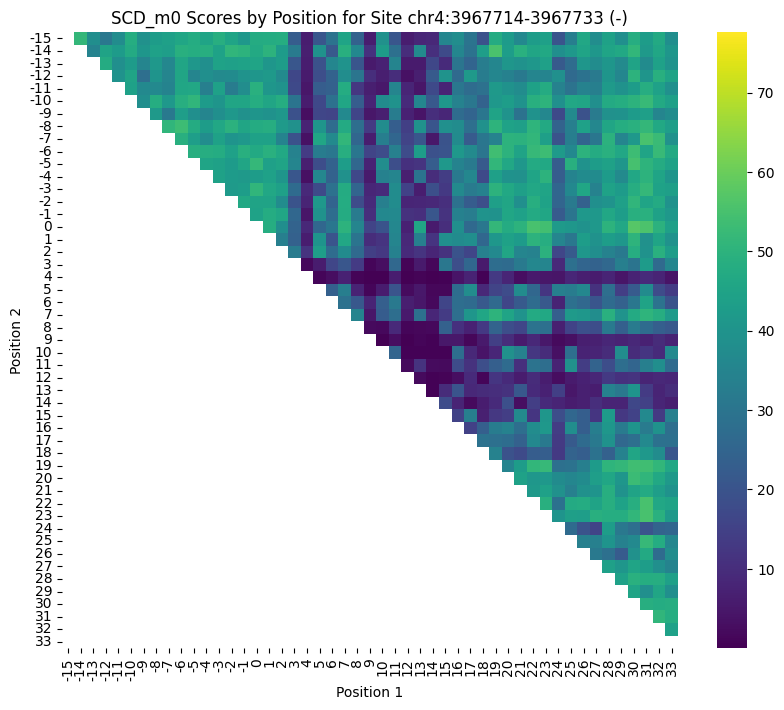

chr4 15328698 15328717 +


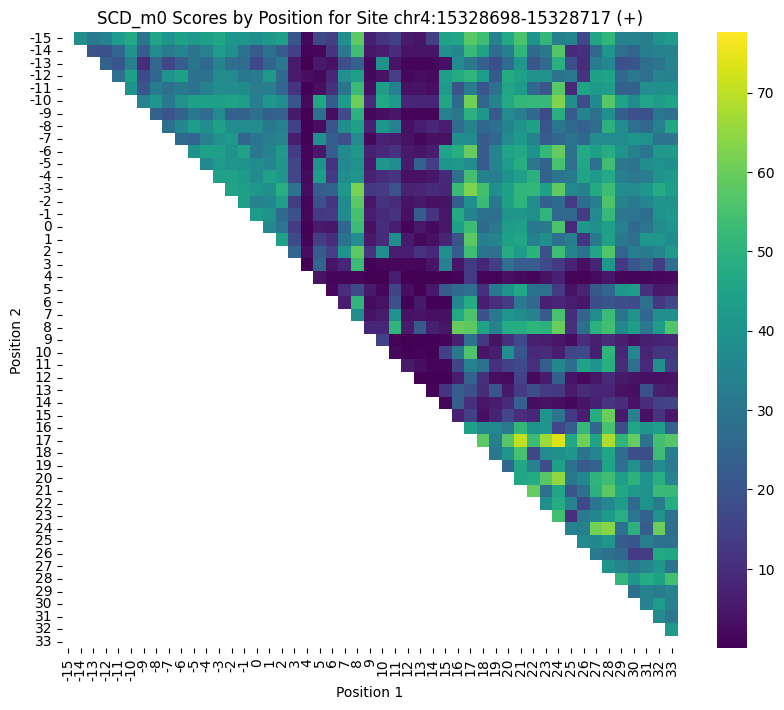

chr4 32572297 32572316 -


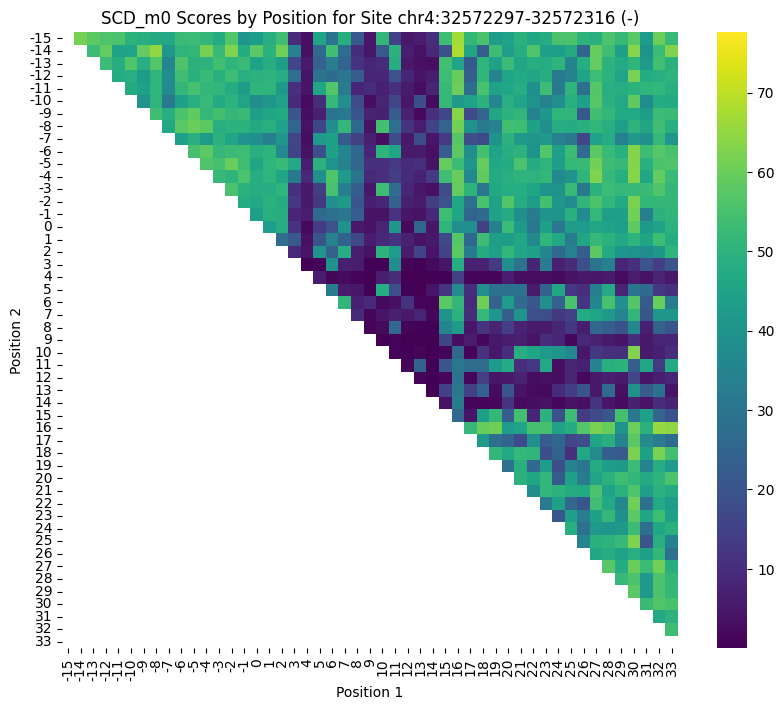

chr4 47419748 47419767 +


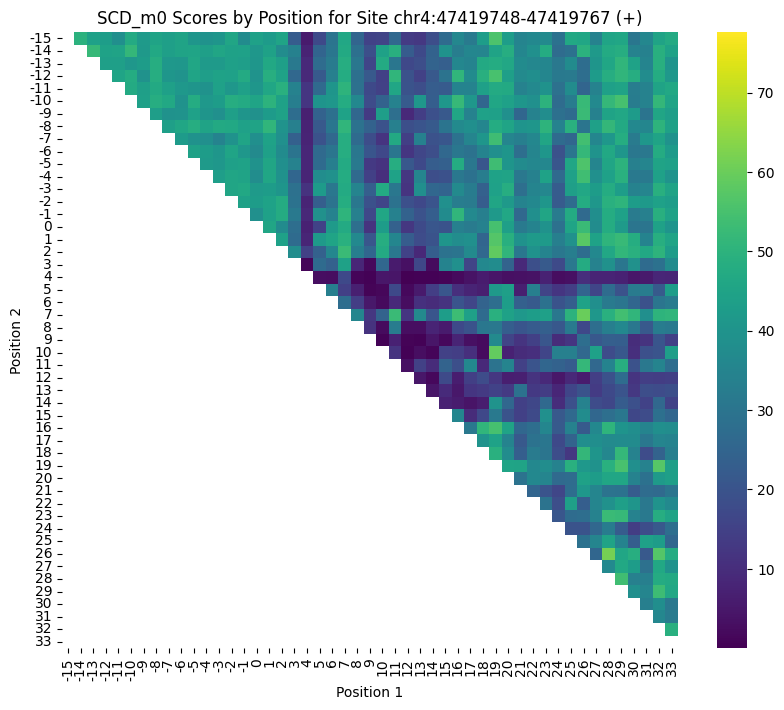

chr4 80517529 80517548 -


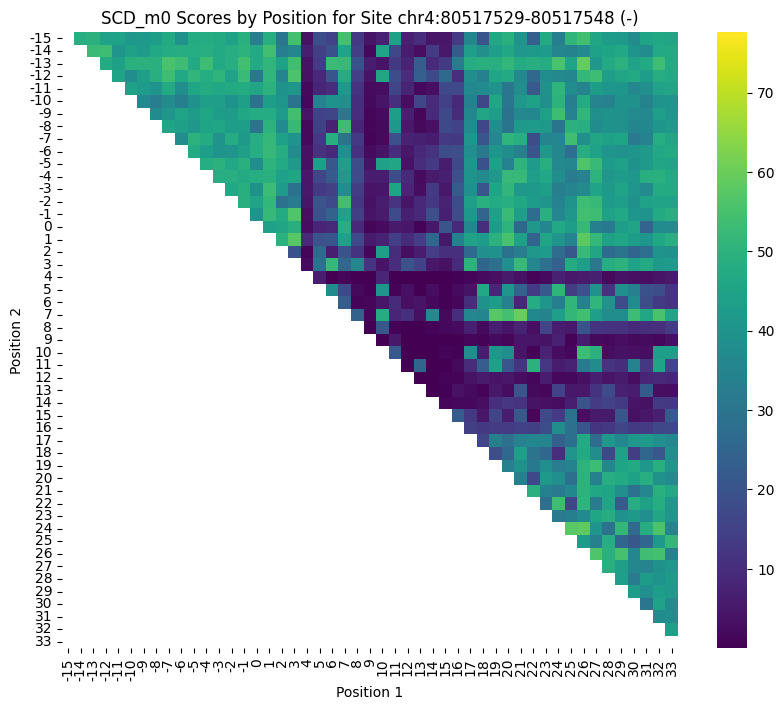

chr4 110022428 110022447 -


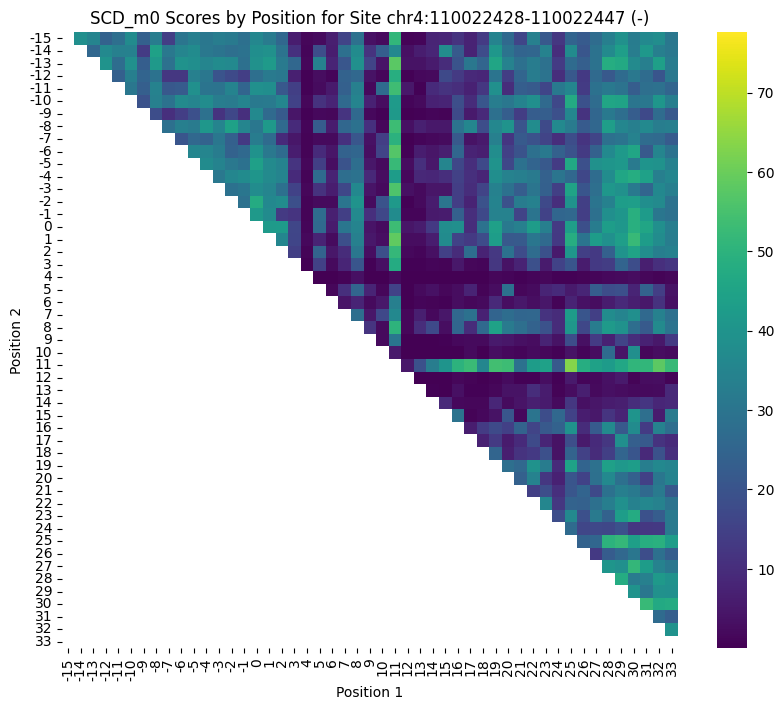

chr5 90203322 90203341 +


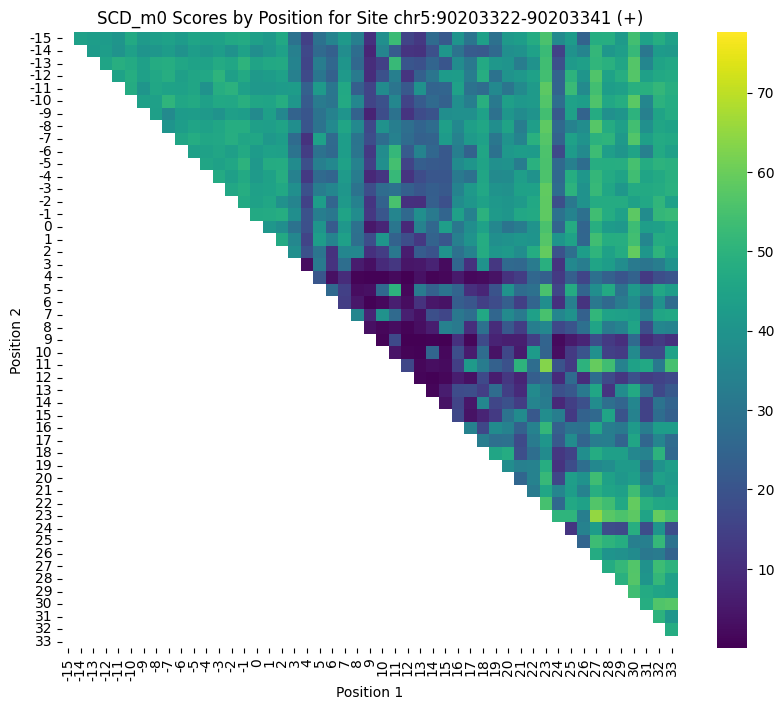

chr5 117506557 117506576 +


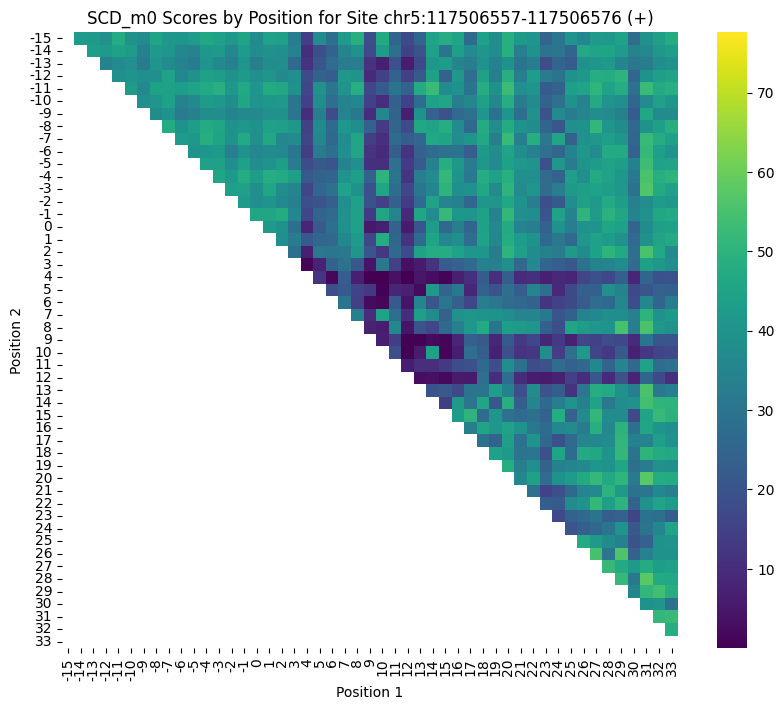

chr5 128440049 128440068 -


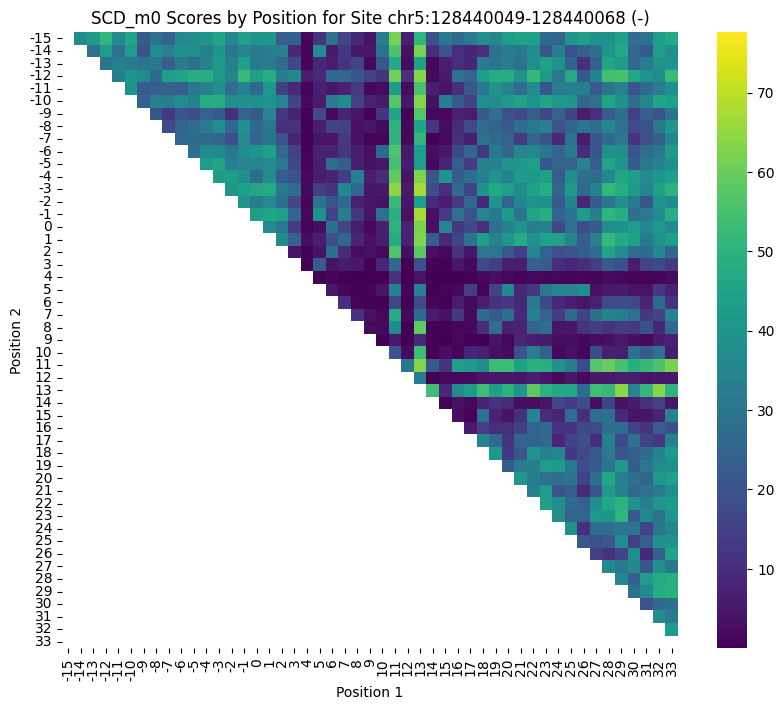

chr5 131430336 131430355 -


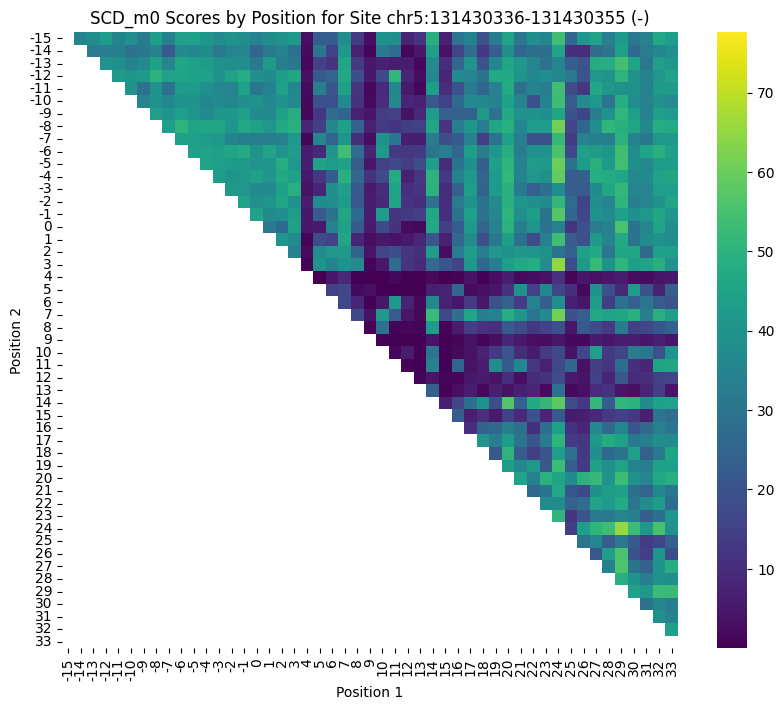

chr5 146914576 146914595 +


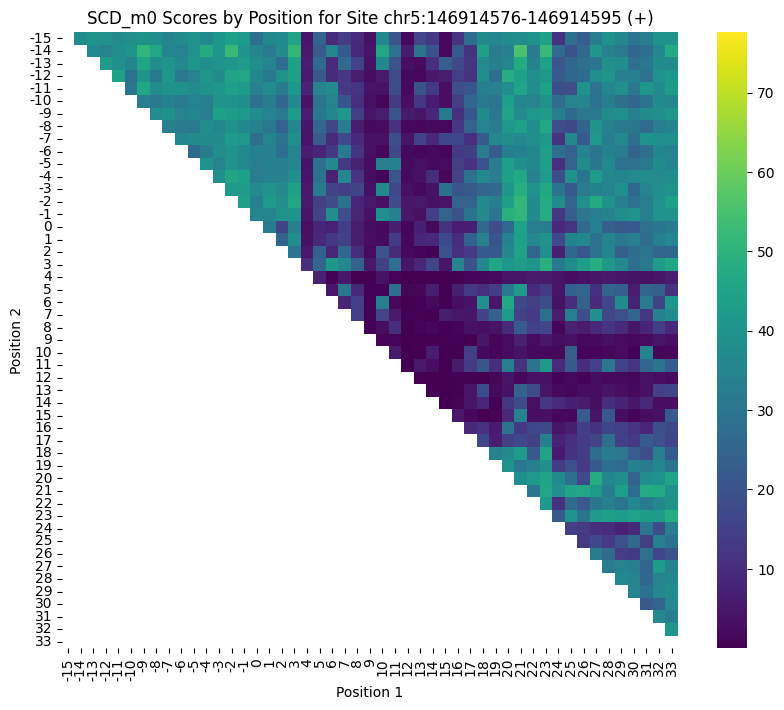

chr6 13281045 13281064 -


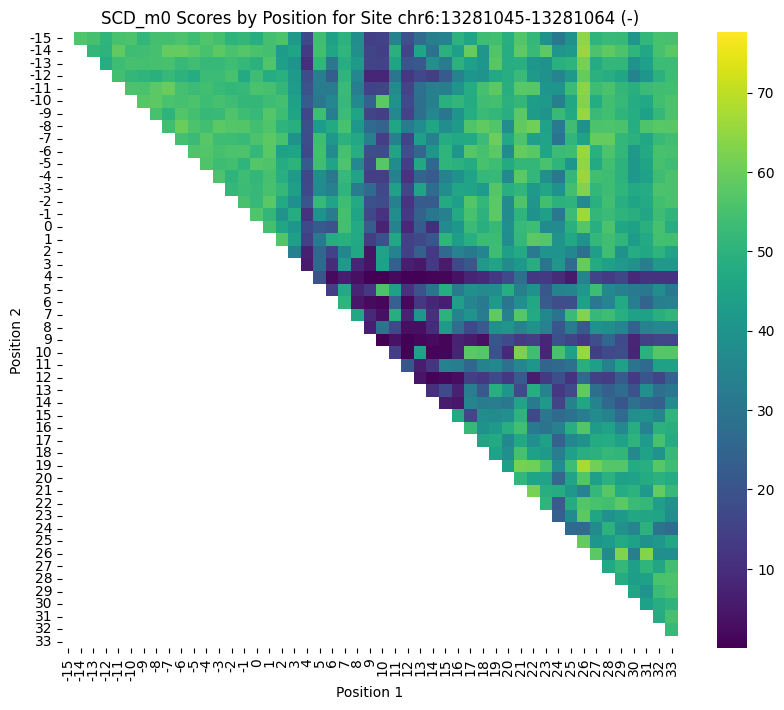

chr6 18087378 18087397 +


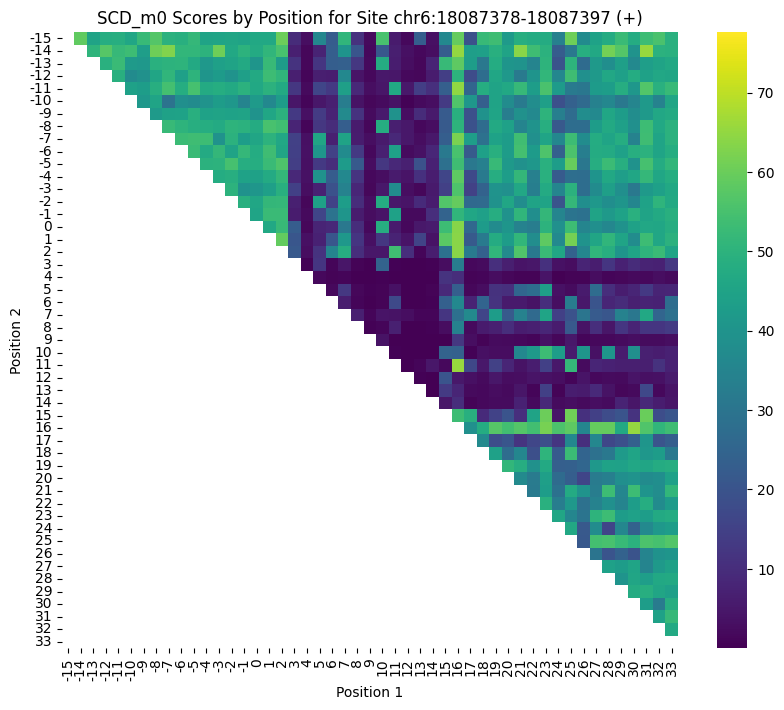

chr6 31664645 31664664 +


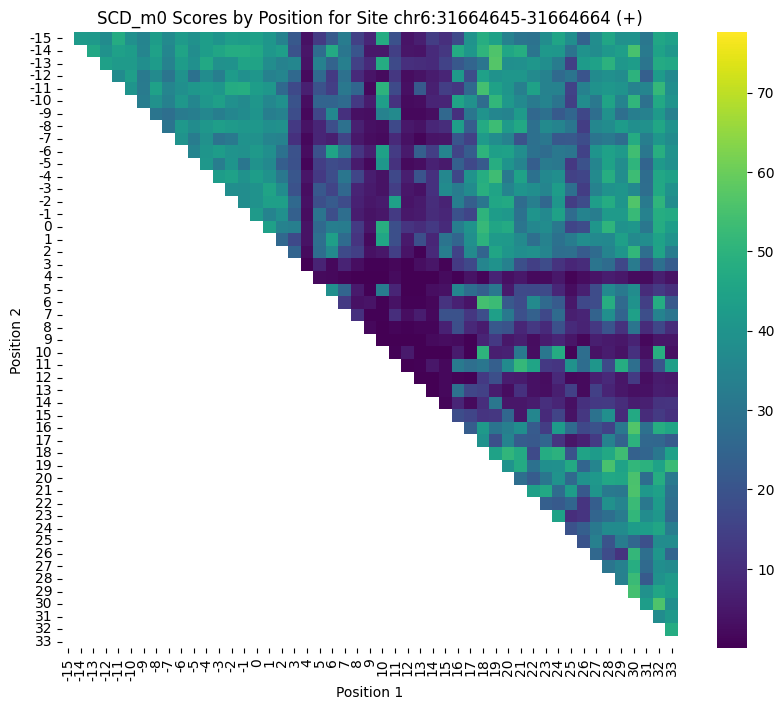

chr6 56691435 56691454 -


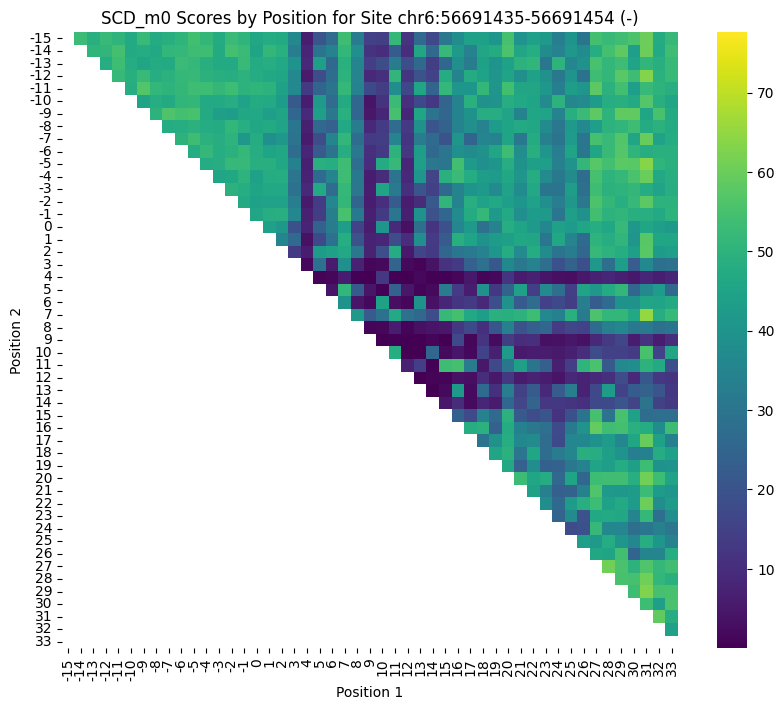

chr6 60555982 60556001 +


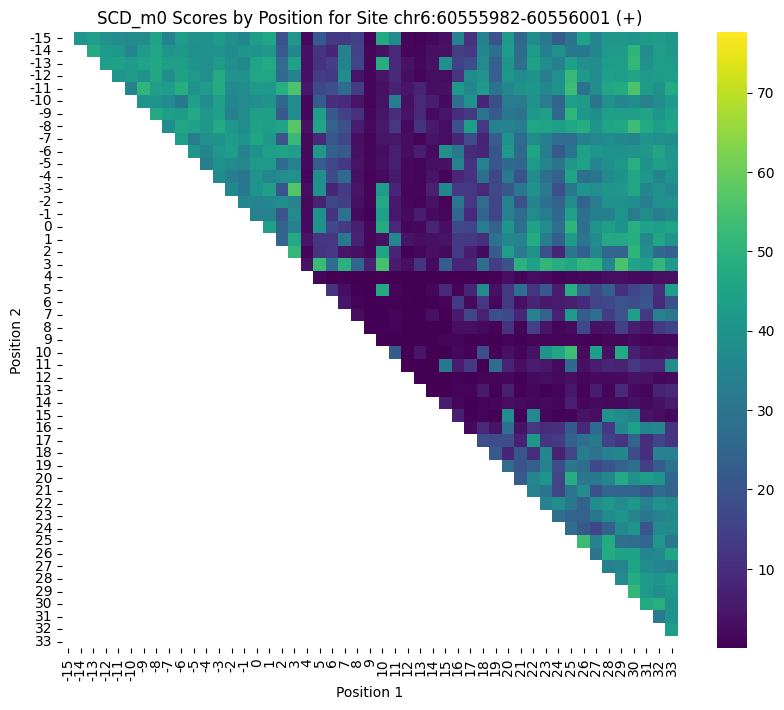

chr6 66533461 66533480 -


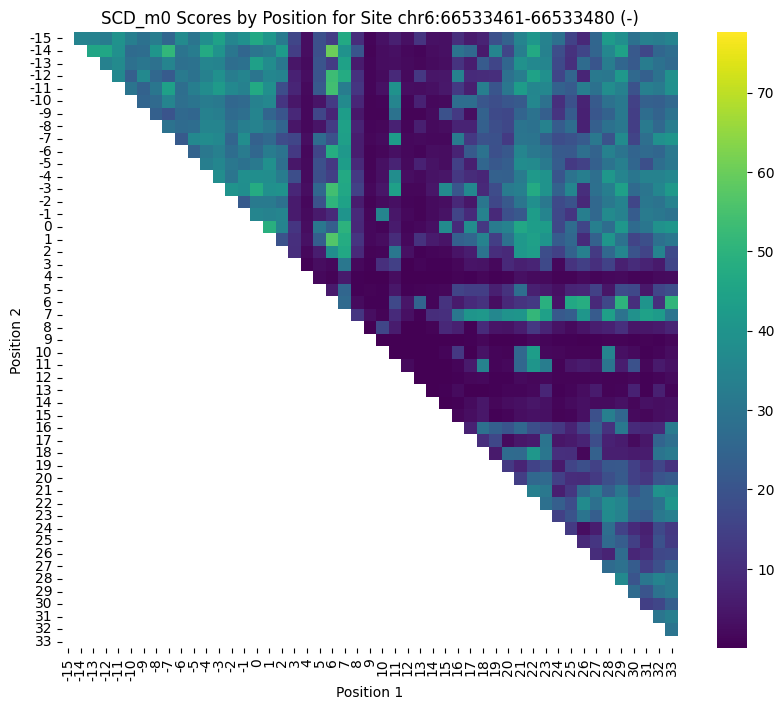

chr6 77628968 77628987 +


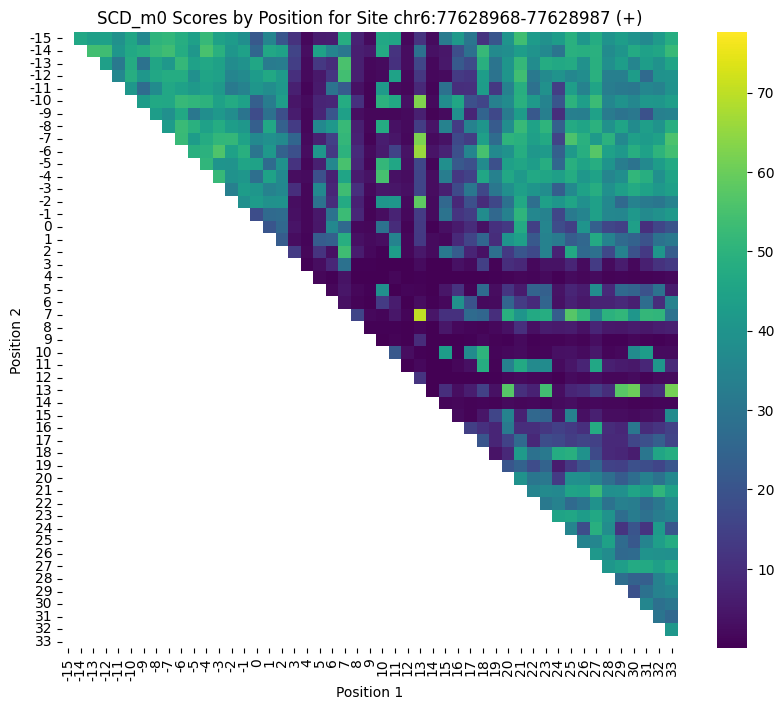

chr6 88113303 88113322 +


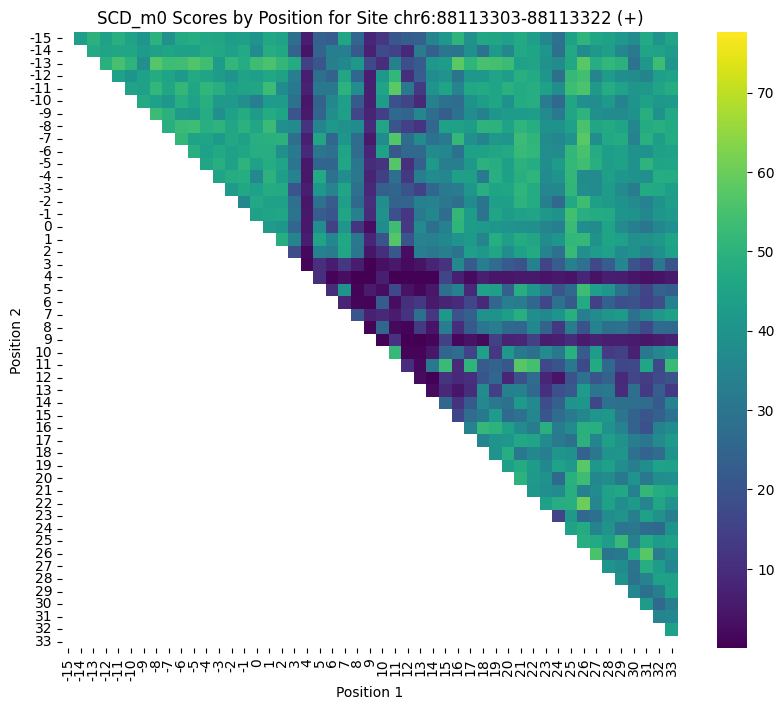

chr6 103697533 103697552 -


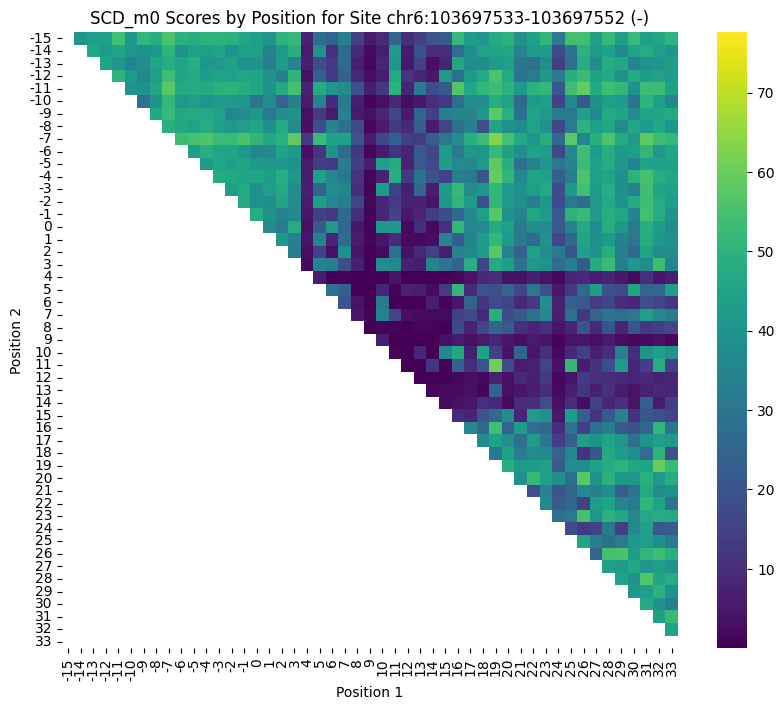

chr6 129255156 129255175 -


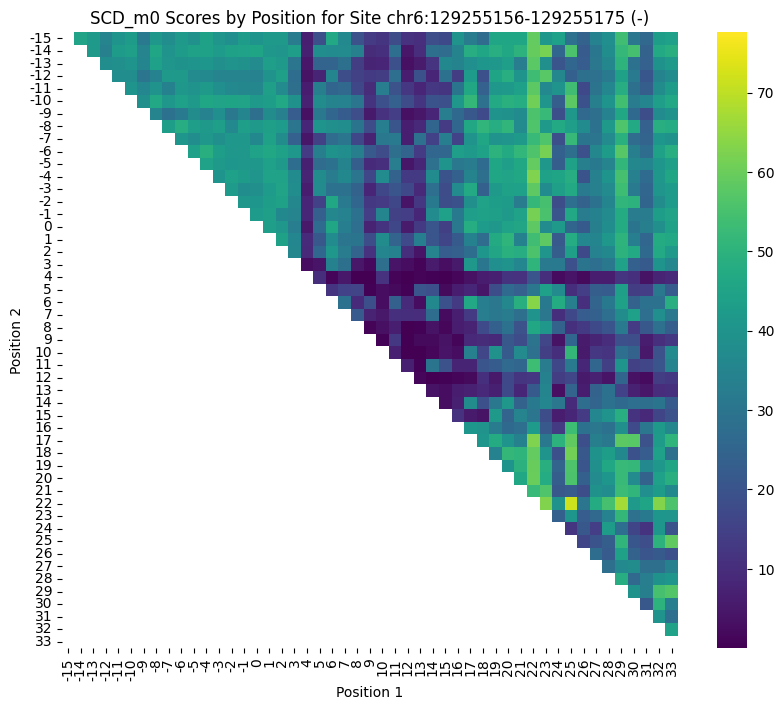

chr6 143219566 143219585 +


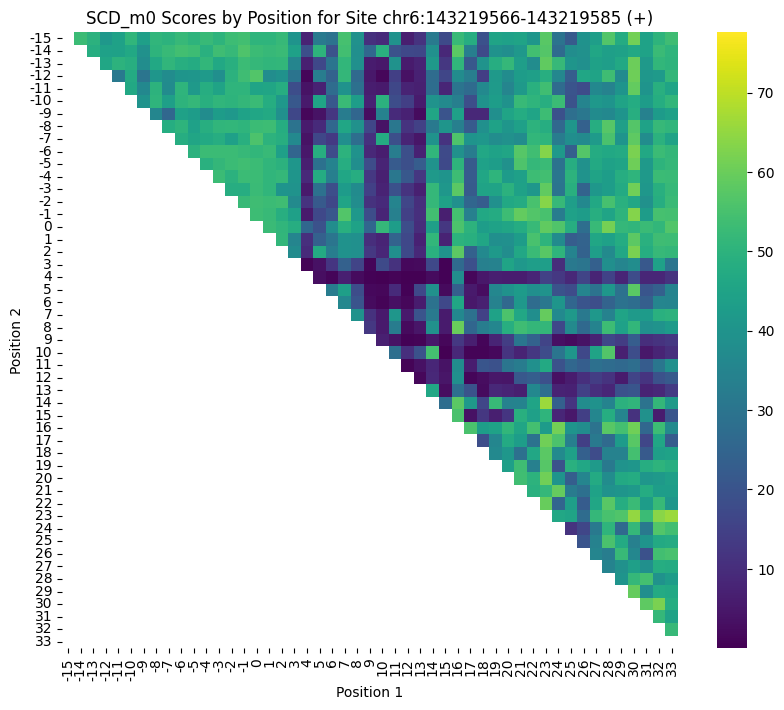

chr7 17066611 17066630 -


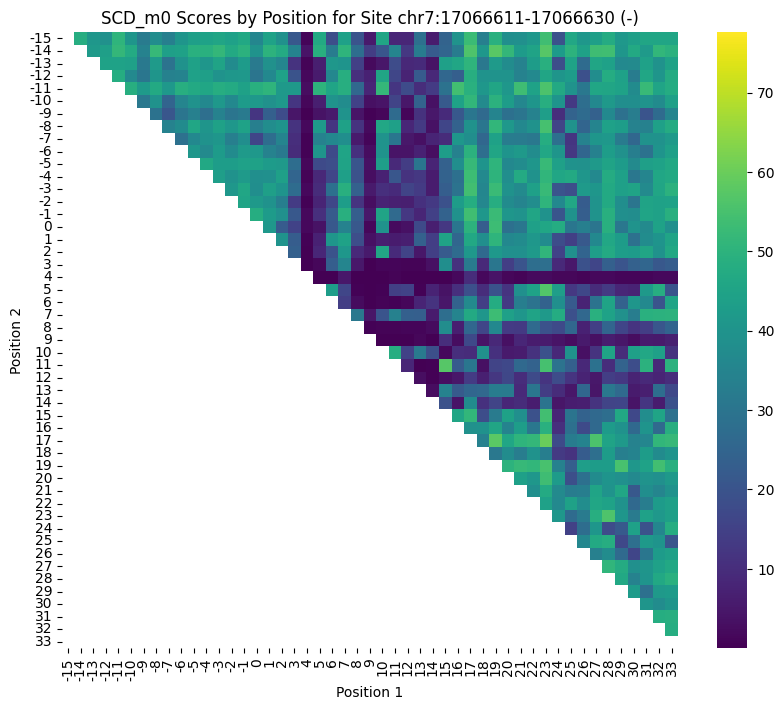

chr7 74363625 74363644 -


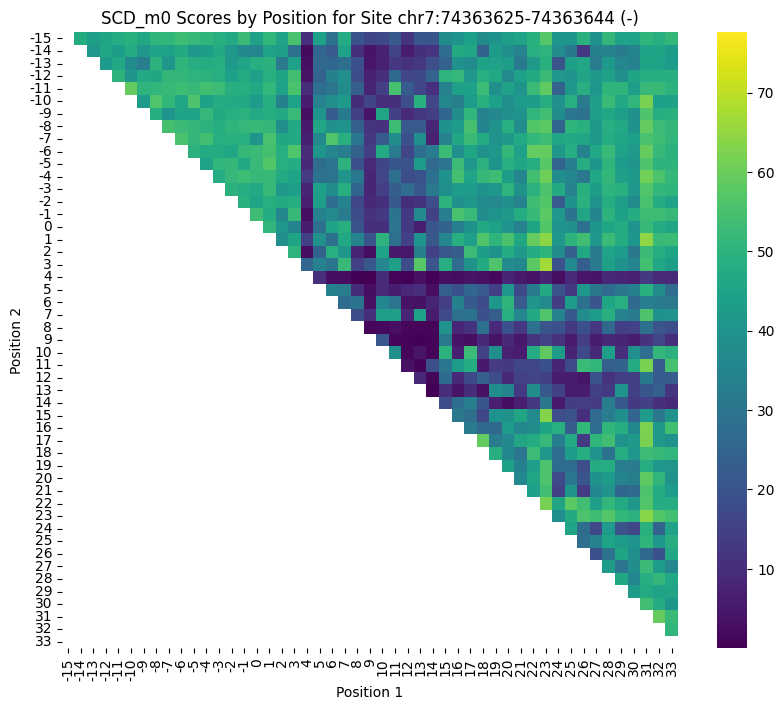

chr7 86211545 86211564 -


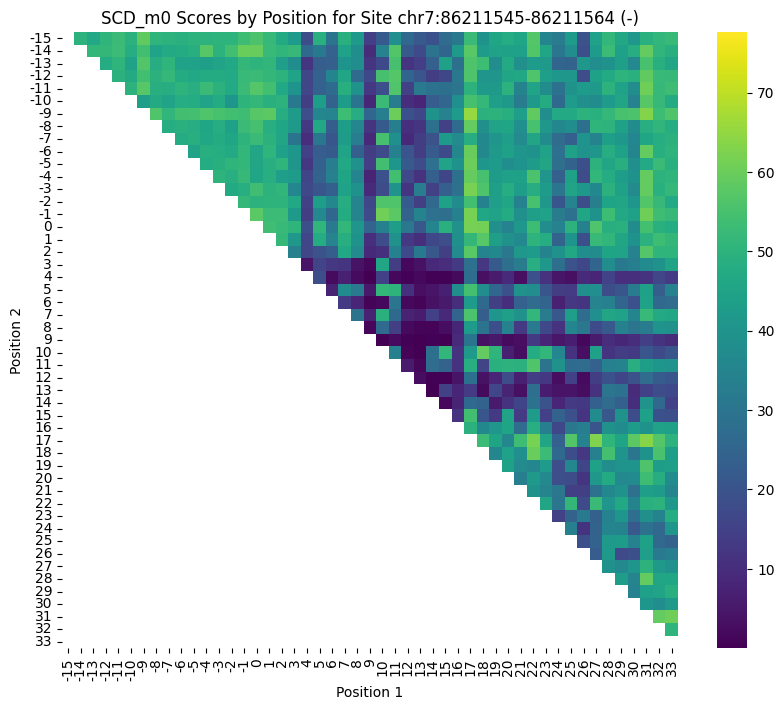

chr7 90410143 90410162 -


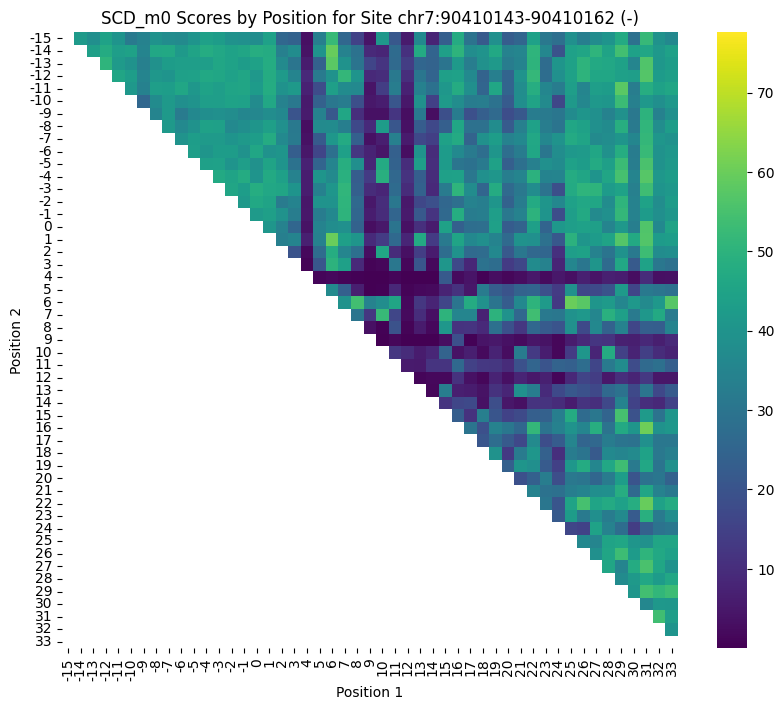

chr7 110645569 110645588 -


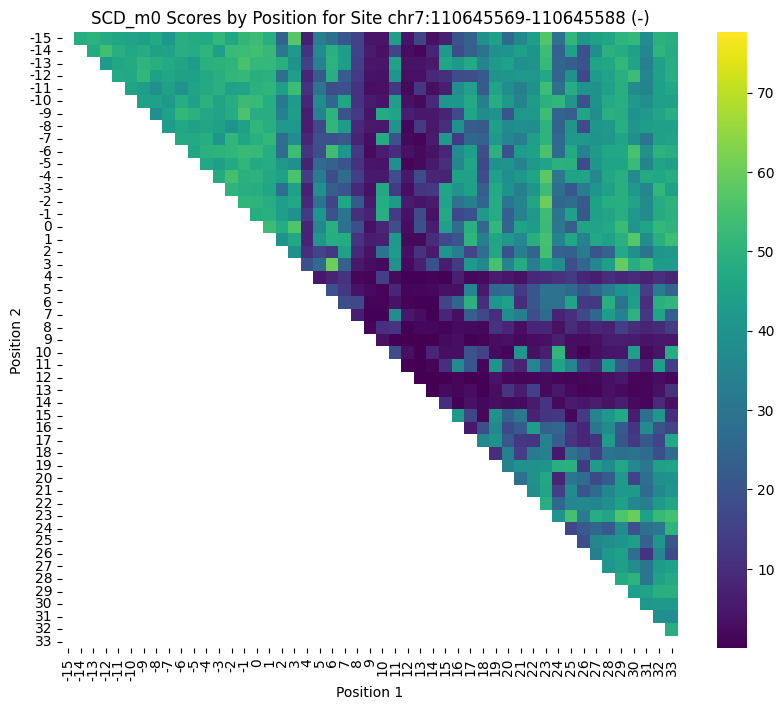

chr7 129649153 129649172 +


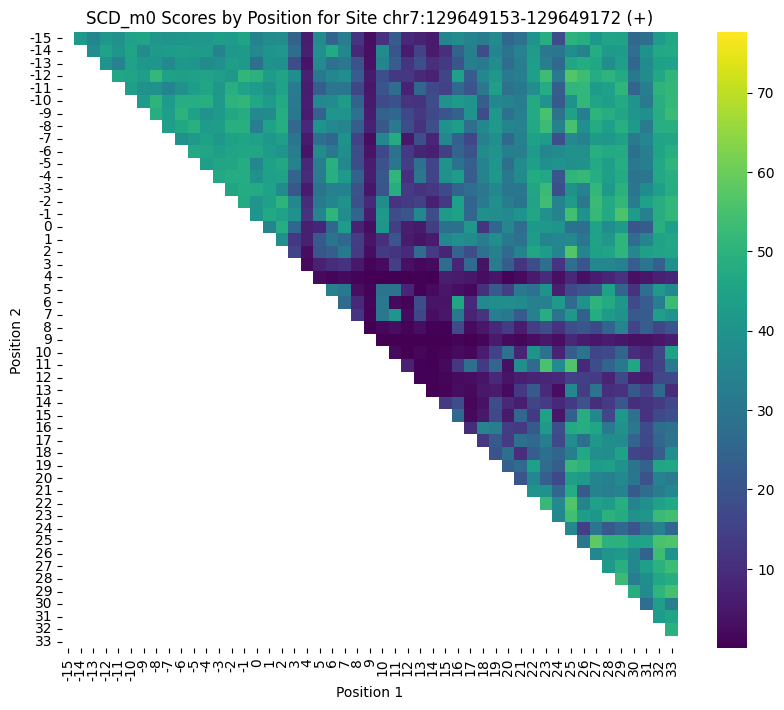

chr7 143153991 143154010 +


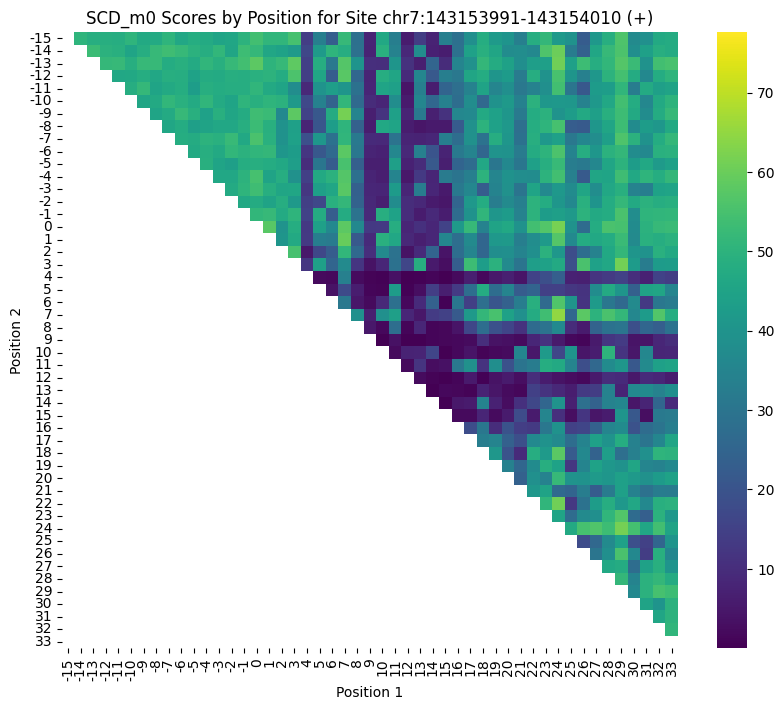

chr8 15138707 15138726 +


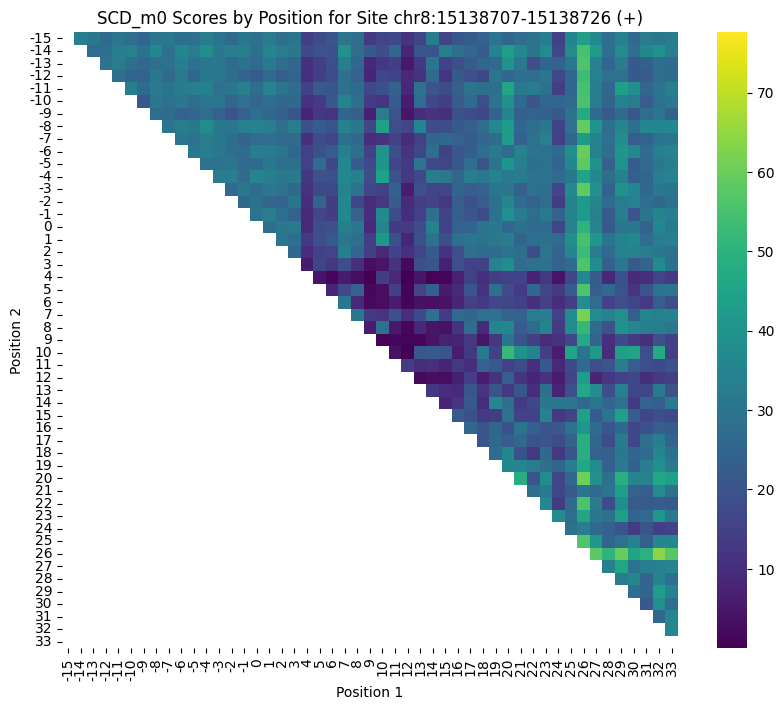

chr8 36523116 36523135 -


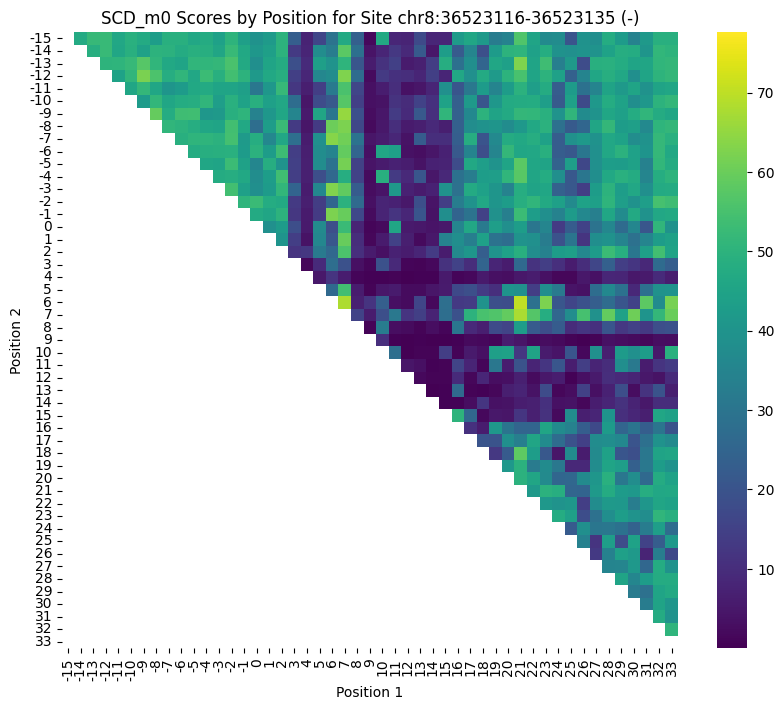

chr8 54493316 54493335 -


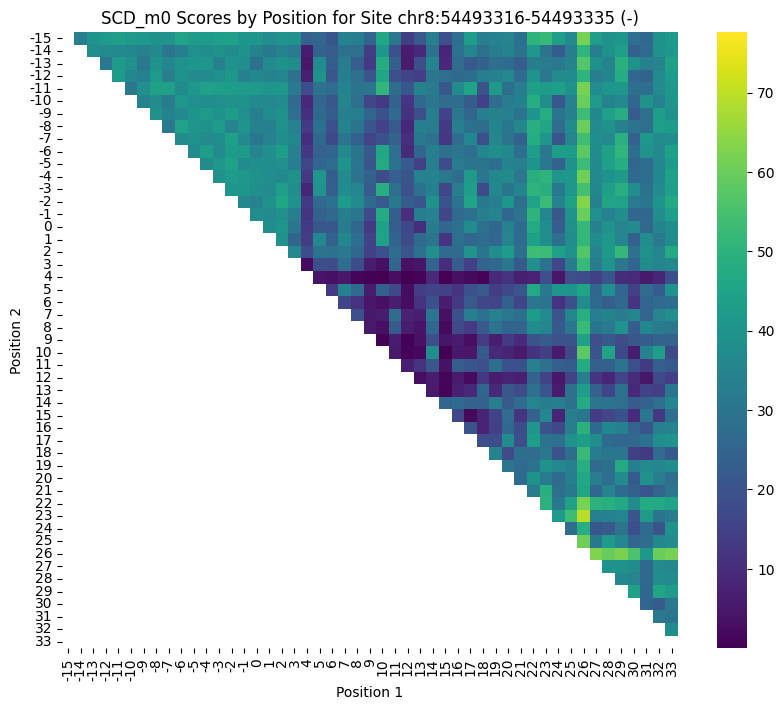

chr8 102781112 102781131 -


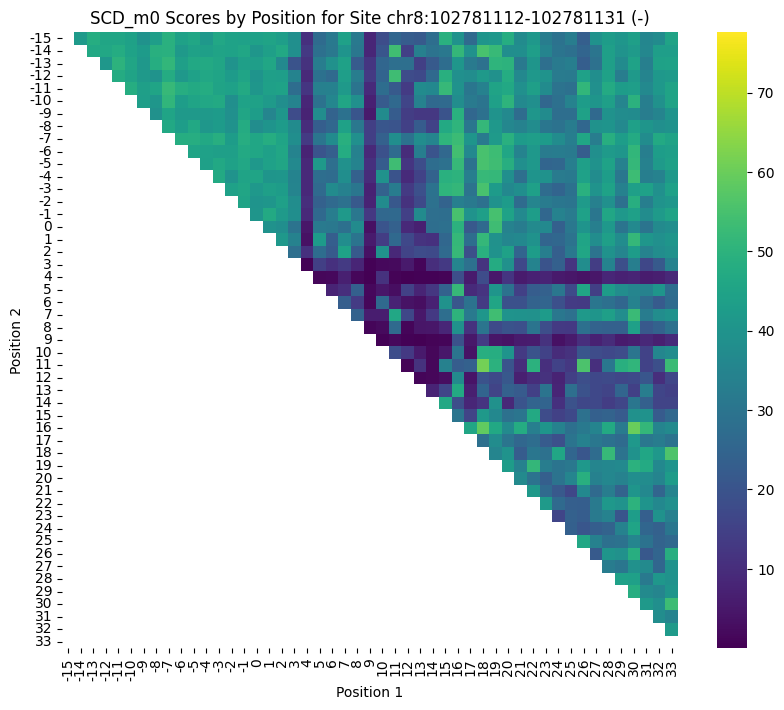

chr8 106687675 106687694 +


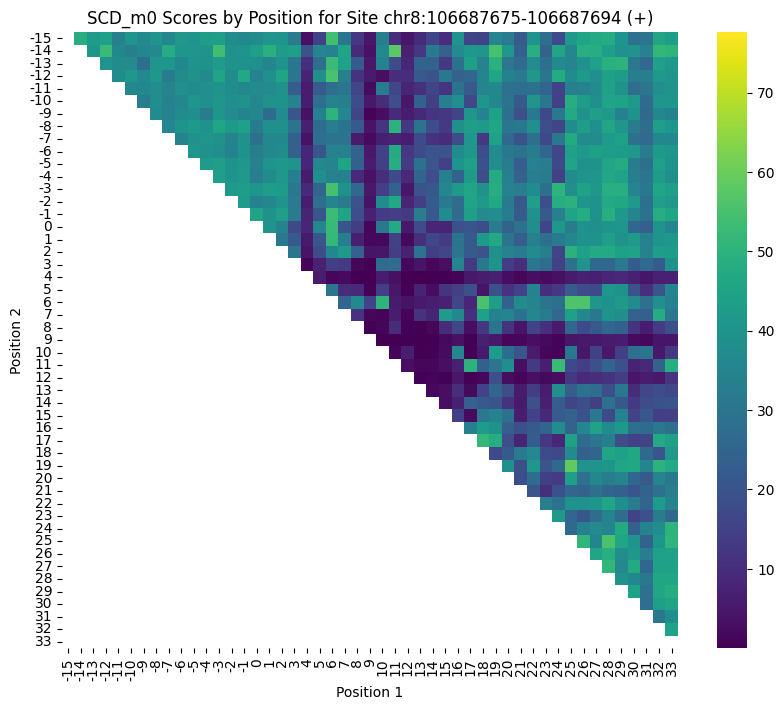

chr8 119384731 119384750 -


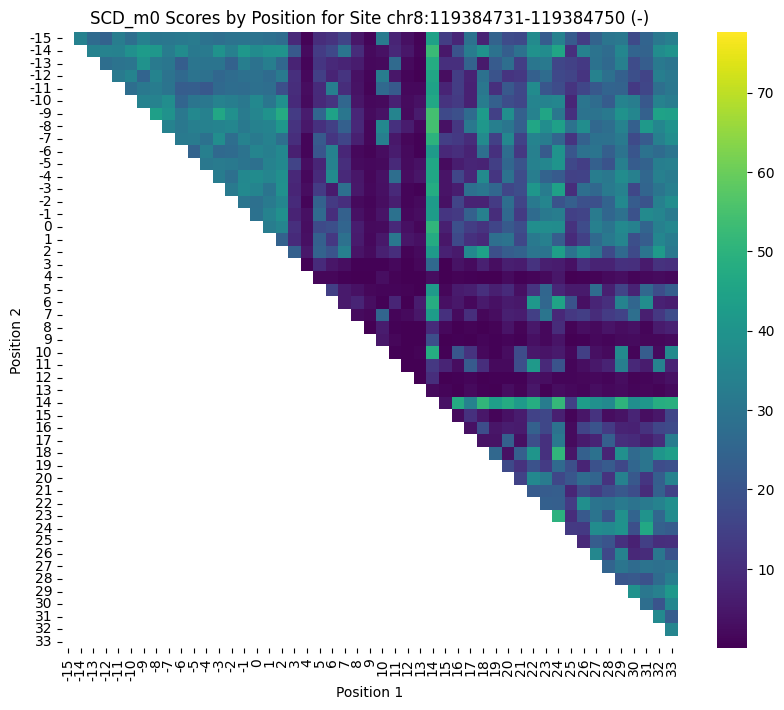

chr9 15685383 15685402 +


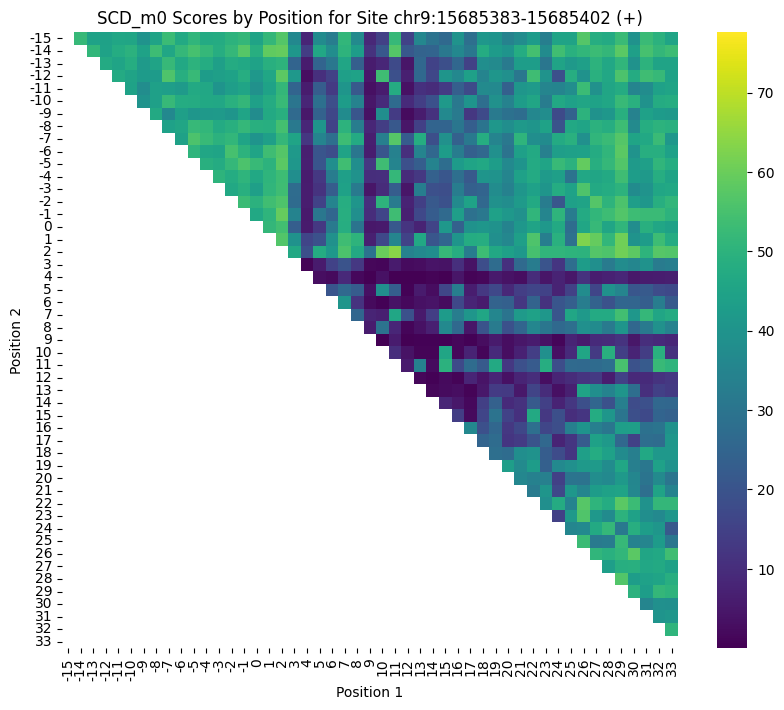

chr9 40806552 40806571 +


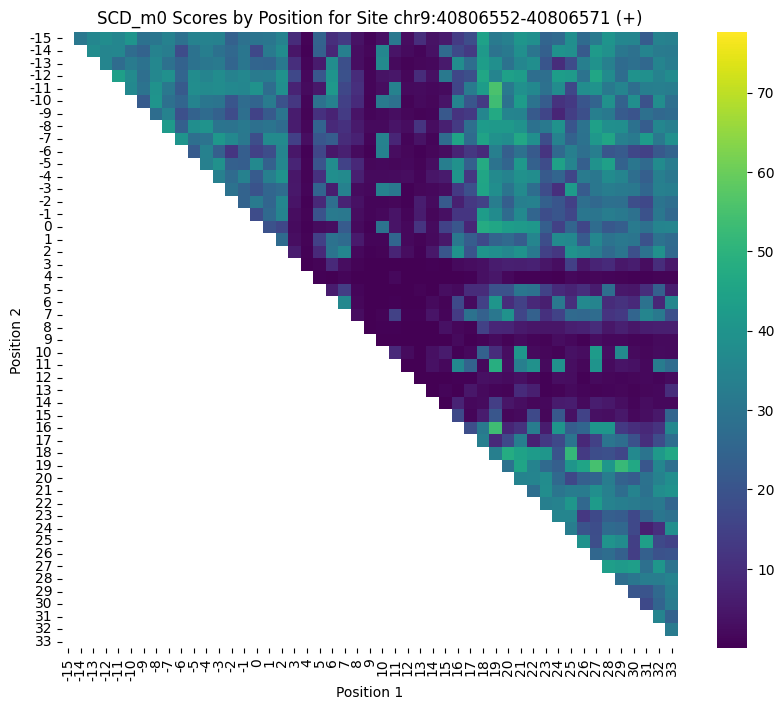

chr9 60245108 60245127 +


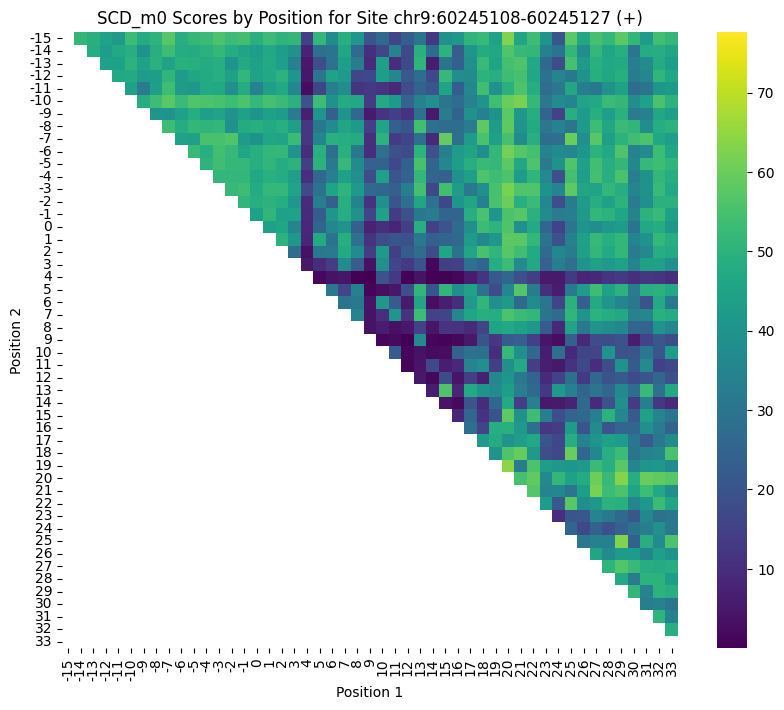

chr9 88222169 88222188 -


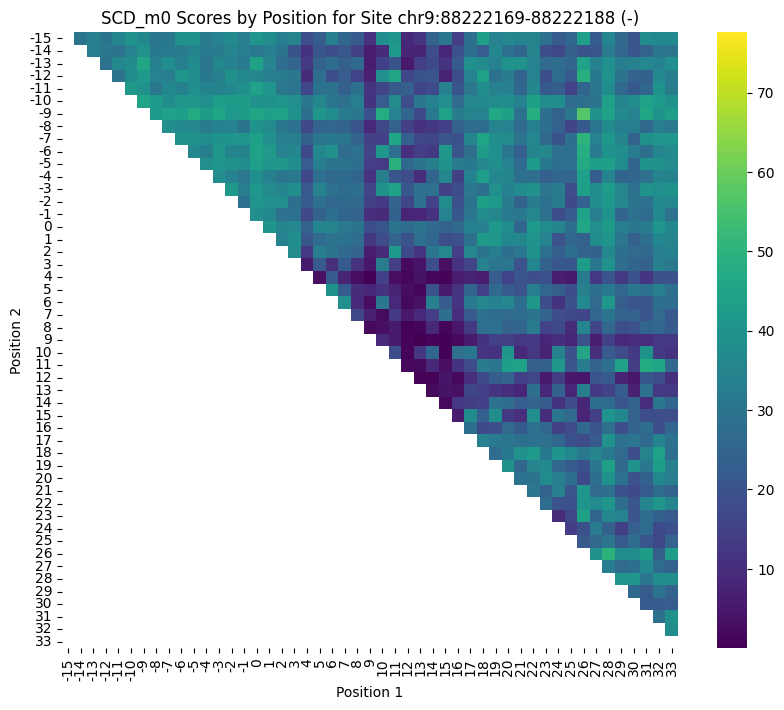

chr9 94738977 94738996 +


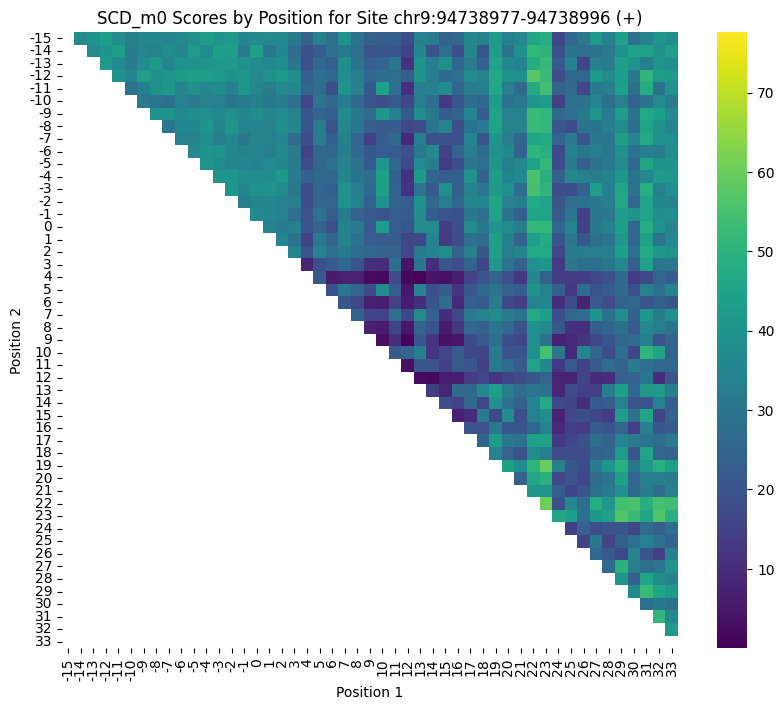

chr9 121458663 121458682 +


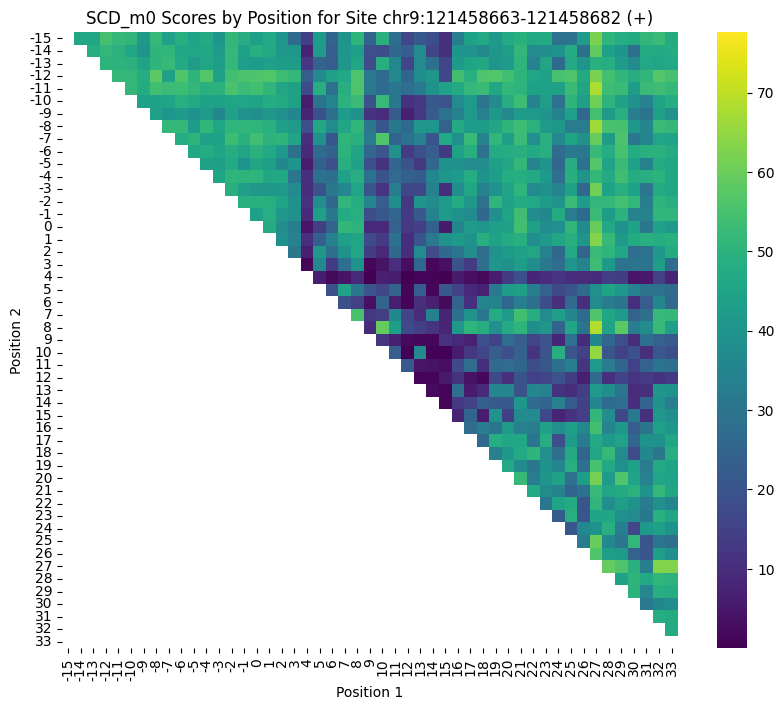

chr9 122729740 122729759 -


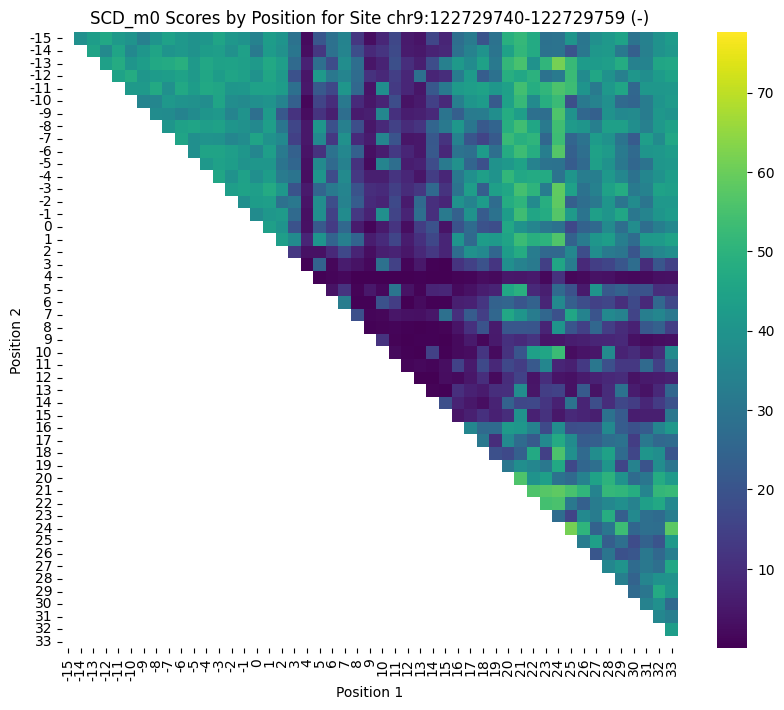

In [10]:
for (chrom, start, end, strand), group in grouped:

    print(chrom, start, end, strand)
    # Determine the range of positions for this group
    pos_min = min(group['pos1'].min(), group['pos2'].min())
    pos_max = max(group['pos1'].max(), group['pos2'].max())
    
    # Initialize a matrix to store the scores
    matrix_size = pos_max - pos_min + 1
    scores_matrix = np.nan * np.zeros((matrix_size, matrix_size))

    # Populate the matrix with SCD_m0 values
    for _, row in group.iterrows():
        x_index = row["pos1"] - pos_min
        y_index = row["pos2"] - pos_min
        scores_matrix[x_index, y_index] = row['SCD_m0']

    # Generate the plot for this group
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(scores_matrix, cmap="viridis", annot=False, square=True,
                     xticklabels=np.arange(pos_min, pos_max + 1),
                     yticklabels=np.arange(pos_min, pos_max + 1),
                     vmin=global_min_scd, vmax=global_max_scd) # Set consistent color scale
    title = f'SCD_m0 Scores by Position for Site {chrom}:{start}-{end} ({strand})'
    ax.set_title(title)
    ax.set_xlabel('Position 1')
    ax.set_ylabel('Position 2')

    plt.show()

## Plot Averaged over 100 Sites

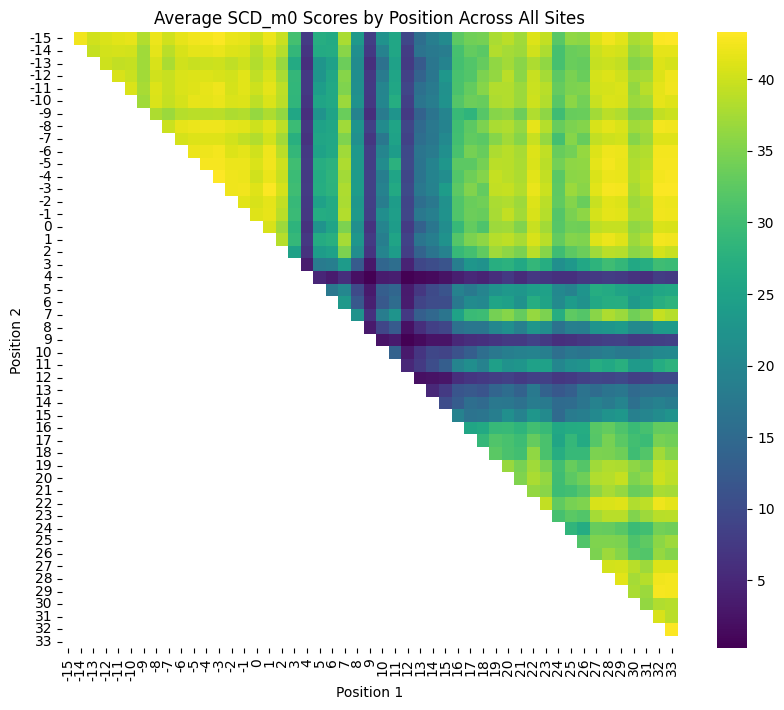

In [12]:
# Assuming `results_df` is your DataFrame
# Determine the range of positions
pos_min = min(df_m0_bg0_tg["pos1"].min(), df_m0_bg0_tg["pos2"].min())
pos_max = max(df_m0_bg0_tg["pos1"].max(), df_m0_bg0_tg["pos2"].max())

# Initialize a structure to hold cumulative scores and counts
scores_sum = {}
counts = {}

# Aggregate scores
for _, row in df_m0_bg0_tg.iterrows():
    pos1, pos2, score = row["pos1"], row["pos2"], row["SCD_m0"]
    key = (pos1, pos2)
    
    if key not in scores_sum:
        scores_sum[key] = 0
        counts[key] = 0
    
    scores_sum[key] += score
    counts[key] += 1

# Calculate average scores
average_scores = {k: scores_sum[k] / counts[k] for k in scores_sum}

# Initialize a matrix for the average scores
matrix_size = pos_max - pos_min + 1
average_scores_matrix = np.nan * np.zeros((matrix_size, matrix_size))

# Populate the matrix
for (pos1, pos2), score in average_scores.items():
    x_index = pos1 - pos_min
    y_index = pos2 - pos_min
    average_scores_matrix[x_index, y_index] = score

# Plot the average scores matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(average_scores_matrix, cmap="viridis", annot=False, square=True,
                 xticklabels=np.arange(pos_min, pos_max + 1),
                 yticklabels=np.arange(pos_min, pos_max + 1),
                 vmin=average_scores_matrix[~np.isnan(average_scores_matrix)].min(), 
                 vmax=average_scores_matrix[~np.isnan(average_scores_matrix)].max())
ax.set_title('Average SCD_m0 Scores by Position Across All Sites')
ax.set_xlabel('Position 1')
ax.set_ylabel('Position 2')

plt.show()